#Análise Exploratória

#Importando as bibliotecas

In [3]:
# !pip install mistat

ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
import math
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import mistat
from scipy import stats
def trim_std(data, alpha):
    """ Calculate trimmed standard deviation """
    data = np.array(data)
    data.sort()
    n = len(data)
    low = int(n * alpha) + 1
    high = int(n * (1 - alpha))
    return data[low:(high + 1)].std()

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

In [2]:
# random.choices seleciona valores da lista usando amostragem com substituição.
import random
random.seed(1)
values = random.choices([1, 2, 3, 4, 5, 6], k=50)

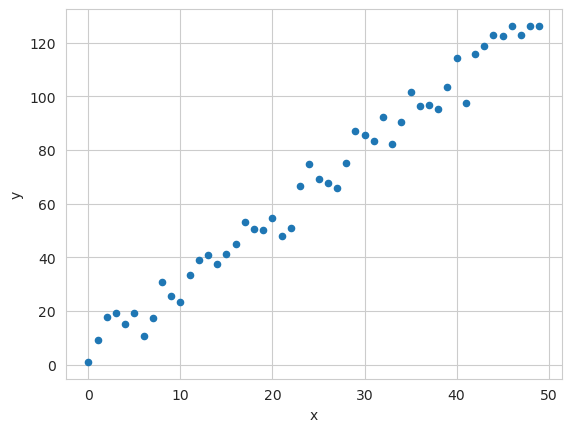

In [4]:
# A função Python range é um iterador. Como precisamos de uma lista de valores,
# precisamos convertê-la explicitamente.
import  pandas as pd
x = list(range(50))
y = [5 + 2.5 * xi for xi in x]
y = [yi + random.uniform(-10, 10) for yi in y]
pd.DataFrame({'x': x, 'y': y}).plot.scatter(x='x', y='y')
plt.show()

In [6]:
# Observe que os valores esperados das somas são 5, 15, 35 e 45
from scipy.stats import binom
np.random.seed(1)
for p in (0.1, 0.3, 0.7, 0.9):
    X = binom.rvs(1, p, size=50)
    print(p, sum(X))

0.1 4
0.3 12
0.7 33
0.9 43


#1. Dados Gerais

# Evolução de alunos matriculados

Inserindo um dataframe com os dados de alunos com deficiência, alunos totais nos últimos censos
(explicar de onde vem os dados, fonte)

In [2]:
#Criando um dicionário, onde cada chave representa uma coluna
dados_gerais = {
'ANO': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'ALUNO_COM_DEFICIENCIA': [34656, 37796, 45088, 51685, 49813, 52542, 59496, 66750],
'ALUNO_TOTAL': [9565483, 9929289, 8081369, 11187296, 11449222, 11589194, 12043993, 16425302],
'POPULACAO_TOTAL': [198314934, 200004188, 201717541, 203475683, 205156587, 206804741, 208494900,210147122]
}
#Criando o dataframe
df_dados_gerais = pd.DataFrame(dados_gerais, columns=['ANO','ALUNO_COM_DEFICIENCIA','ALUNO_TOTAL','POPULACAO_TOTAL'])
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL
0,2012,34656,9565483,198314934
1,2013,37796,9929289,200004188
2,2014,45088,8081369,201717541
3,2015,51685,11187296,203475683
4,2016,49813,11449222,205156587
5,2017,52542,11589194,206804741
6,2018,59496,12043993,208494900
7,2019,66750,16425302,210147122


In [3]:
#Inserindo uma coluna com a porcentagem para saber a proporção dos alunos com deficiência em relação ao total de alunos
df_dados_gerais['PORCENTAGEM'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'] / df_dados_gerais['ALUNO_TOTAL'] * 100
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM
0,2012,34656,9565483,198314934,0.362303
1,2013,37796,9929289,200004188,0.380652
2,2014,45088,8081369,201717541,0.557925
3,2015,51685,11187296,203475683,0.461997
4,2016,49813,11449222,205156587,0.435078
5,2017,52542,11589194,206804741,0.453371
6,2018,59496,12043993,208494900,0.493989
7,2019,66750,16425302,210147122,0.406385


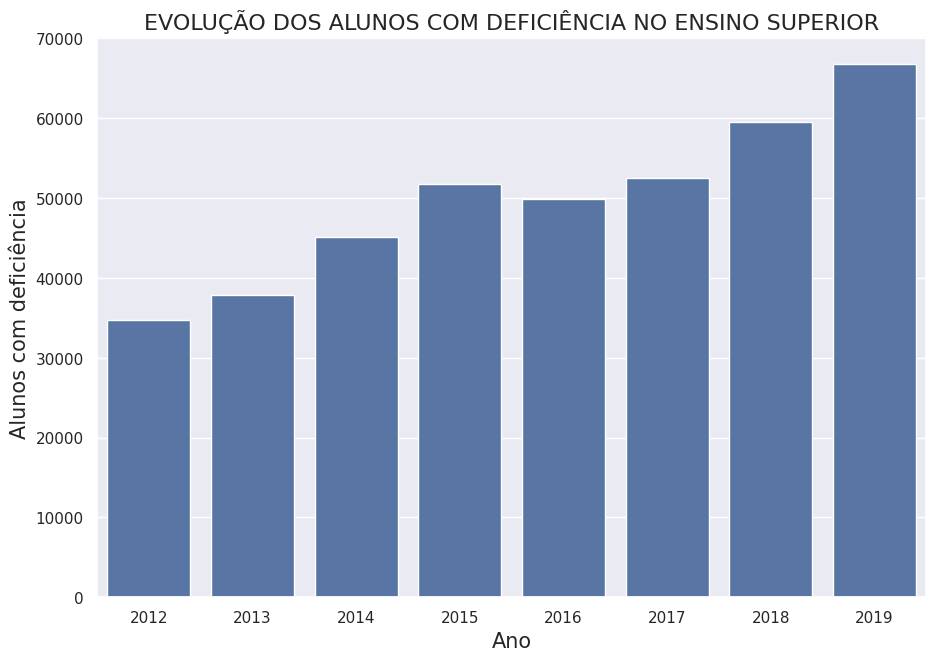

In [ ]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(10.7,7.27)})
evolucao_alunoscomdeficiencia = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_COM_DEFICIENCIA')
plt.title("EVOLUÇÃO DOS ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunoscomdeficiencia.png', transparent = True)

<ipython-input-217-349699e9d41c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  evolucao_alunos = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_TOTAL', palette='crest')


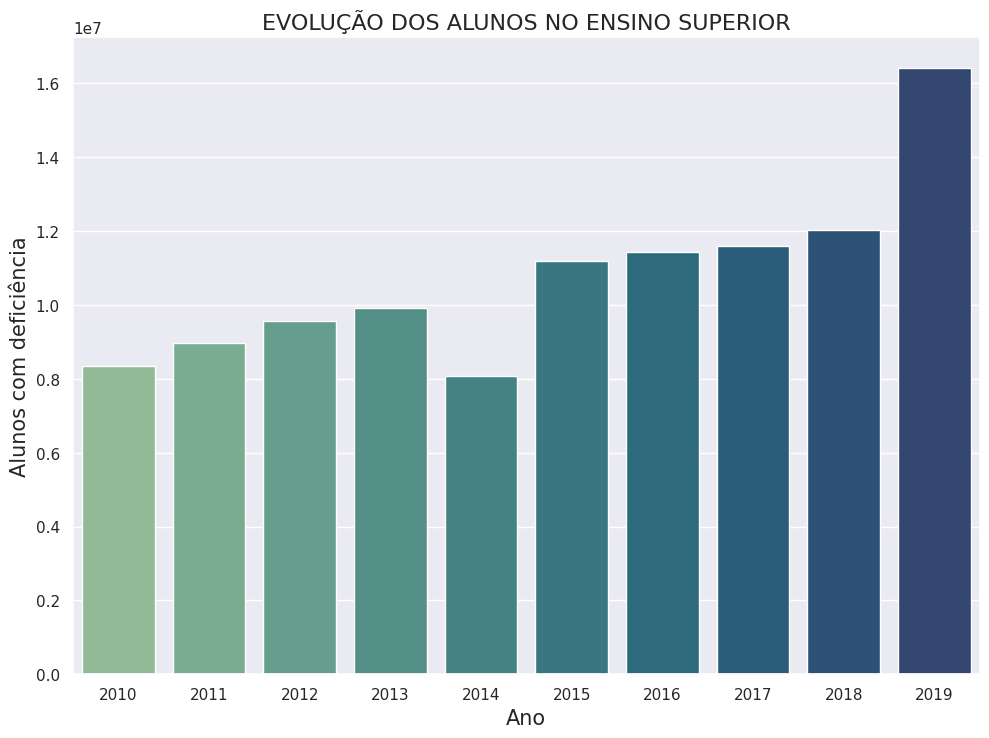

In [ ]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunos = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_TOTAL', palette='crest')
plt.title("EVOLUÇÃO DOS ALUNOS NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunos.png', transparent = True)

In [ ]:
#Inserindo um percentual de evolução anual no dataframe
df_dados_gerais['VALOR_INICIAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'].shift()
df_dados_gerais['VALOR_FINAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA']
df_dados_gerais['EVOLUCAO_ANUAL'] = (df_dados_gerais['VALOR_FINAL'] - df_dados_gerais['VALOR_INICIAL']) * 100/ df_dados_gerais['VALOR_INICIAL']
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM,VALOR_INICIAL,VALOR_FINAL,EVOLUCAO_ANUAL
0,2010,25205,8337219,194890682,0.302319,NaN,25205,NaN
1,2011,29033,8961724,196603732,0.323967,25205.0,29033,15.187463
2,2012,34656,9565483,198314934,0.362303,29033.0,34656,19.367616
3,2013,37796,9929289,200004188,0.380652,34656.0,37796,9.060480
4,2014,45088,8081369,201717541,0.557925,37796.0,45088,19.293047
5,2015,51685,11187296,203475683,0.461997,45088.0,51685,14.631388
6,2016,49813,11449222,205156587,0.435078,51685.0,49813,-3.621941
7,2017,52542,11589194,206804741,0.453371,49813.0,52542,5.478490
8,2018,59496,12043993,208494900,0.493989,52542.0,59496,13.235126
9,2019,66750,16425302,210147122,0.406385,59496.0,66750,12.192416


In [ ]:
#Tipos de dados do dataframe
df_dados_gerais.dtypes

,0
ANO,int64
ALUNO_COM_DEFICIENCIA,int64
ALUNO_TOTAL,int64
POPULACAO_TOTAL,int64
PORCENTAGEM,float64
VALOR_INICIAL,float64
VALOR_FINAL,int64
EVOLUCAO_ANUAL,float64


In [ ]:
#Explorando dados estatísticos do dataframe
df_dados_gerais.describe()

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM,VALOR_INICIAL,VALOR_FINAL,EVOLUCAO_ANUAL
count,10.00000,10.000000,1.000000e+01,1.000000e+01,10.000000,9.000000,10.000000,9.000000
mean,2014.50000,45206.400000,1.075701e+07,2.025610e+08,0.417798,42812.666667,45206.400000,11.647121
std,3.02765,13388.209051,2.437782e+06,5.141812e+06,0.078661,11712.711791,13388.209051,7.247518
min,2010.00000,25205.000000,8.081369e+06,1.948907e+08,0.302319,25205.000000,25205.000000,-3.621941
25%,2012.25000,35441.000000,9.112664e+06,1.987372e+08,0.366890,34656.000000,35441.000000,9.060480
50%,2014.50000,47450.500000,1.055829e+07,2.025966e+08,0.420731,45088.000000,47450.500000,13.235126
75%,2016.75000,52327.750000,1.155420e+07,2.063927e+08,0.459841,51685.000000,52327.750000,15.187463
max,2019.00000,66750.000000,1.642530e+07,2.101471e+08,0.557925,59496.000000,66750.000000,19.367616


<Figure size 700x400 with 0 Axes>

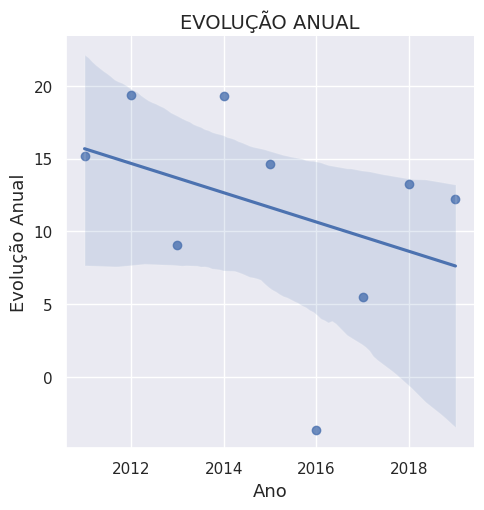

In [ ]:
#Visualizando a evolução com um LinePlot
plt.figure(figsize =(7, 4))
sns.lmplot(x='ANO',y='EVOLUCAO_ANUAL',data=df_dados_gerais)
plt.title("EVOLUÇÃO ANUAL", loc="center", fontsize=14)
plt.xlabel('Ano', fontsize=13), plt.ylabel('Evolução Anual', fontsize=13)
plt.savefig('evolucao_anual.png', transparent = True)

#Proporções de pessoas com deficiência no Brasil e no ensino superior

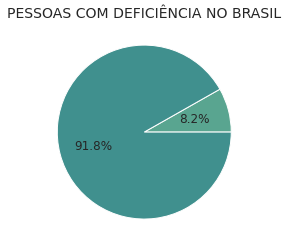

In [ ]:
plt.figure(figsize = (5,4))
brasil = [17258000,(210147125-17258000)]
colors = sns.color_palette("crest")[1:]
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", loc="center", fontsize=14)
plt.savefig('pessoas_brasil.png', transparent = True)

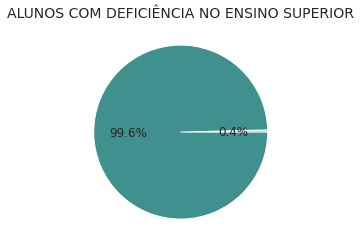

In [ ]:
plt.figure(figsize = (5,4))
brasil = [66750,(16525302-66750)]
colors = sns.color_palette("crest")[1:]
plt.pie(brasil, colors=colors, autopct='%.1f%%')
plt.title("ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=14)
plt.savefig('alunos_ensino_superior.png', transparent = True)

#2. Dados do Censo do Ensino Superior (INEP)

#2.1 Censo 2019 - IES

In [ ]:
#Carregando os dados das IES
url_censo_ies_2019 = 'https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_IES_2019.CSV'
df_ies = pd.read_csv(url_censo_ies_2019, sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF'])
df_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF'
    })
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais


In [ ]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais


In [ ]:
#Exportando o dataframe para um arquivo csv
df_ies.to_csv('df_ies.csv', sep=',')

#2.2 Censo 2019 - Cursos

In [ ]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,0421D01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,0113P01,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,0923S01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


Avaliando a quantidade de dados faltantes em recursos:

In [ ]:
df_curso.shape

(40709, 25)

In [ ]:
#Avaliando a quantidade de dados NaN na coluna referente à material digital
df_curso[df_curso['IN_MATERIAL_DIGITAL'].isnull()]

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
5,2019,1,51.0,5103403.0,8,CIÊNCIAS CONTÁBEIS,1,0411C01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296,33
6,2019,1,51.0,5103403.0,9,AGRONOMIA,1,0811A04,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,41
7,2019,1,51.0,5103403.0,10,ENGENHARIA FLORESTAL,1,0821E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40702,2019,23705,35.0,3516408.0,1465936,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,1,0713S01,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,0
40703,2019,23705,35.0,3516408.0,5001434,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,1,0612G01,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,0
40704,2019,23713,33.0,3300407.0,1503889,SISTEMAS PARA INTERNET,1,0615S03,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,0
40705,2019,23725,53.0,5300108.0,1454890,GESTÃO PÚBLICA,1,0413G12,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0


A porcentagem de dados NaN referentes à existência de material digital nos cursos é de 0,08%, ou seja, há 3308 dados NaN num total de 40709.

Foram verificados também a quantidade de dados NaN de todos os outros recursos e o resultado foi o mesmo, 3308 dados NaN OU 0,08% do total de dados registrados em curso.


In [ ]:
#Reduzindo os dados de 'CO_CINE_ROTULO' apenas para a grande área
def grande_area(row):
  return row['CO_CINE_ROTULO'][0:2]
df_curso['CO_CINE_ROTULO'] = df_curso.apply(grande_area, axis=1)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,04,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,03,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,07,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,01,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,09,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pela área de formação geral, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco
area_formacao = {
    '01':'Educação',
    '02':'Artes e Humanidades',
    '03':'Ciências Sociais, Jornalismo e Informação',
    '04':'Negócios, Administração e Direito',
    '05':'Ciências naturais, Matemática e Estatística',
    '06':'Tecnologias da informação e Comunicação (TIC)',
    '07':'Engenharia, Produção e Construção',
    '08':'Agricultura, Veterinária, Recursos florestais e pesqueiros',
    '09':'Saúde e Bem-estar',
    '10':'Serviços',
}
df_curso = df_curso.astype({'CO_CINE_ROTULO':str})
df_curso.CO_CINE_ROTULO = df_curso.CO_CINE_ROTULO.map(area_formacao)
df_curso.head()


,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,"Negócios, Administração e Direito",1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,"Ciências Sociais, Jornalismo e Informação",1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,"Engenharia, Produção e Construção",1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,Educação,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,Saúde e Bem-estar,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


Para discutir com o grupo:

Problemas com os dados do Censo, como:

1. Vários cursos do censo não condizem com os códigos de grande área, como:

*   linha 1: DIREITO em "Ciências, Matemática e Computação"
*   linha 3: ENGENHARIA CIVIL em "Saúde e Bem Estar Social"

2. alguns dados não informados, como:

*   linha 4: SERVIÇO SOCIAL




In [ ]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'CO_CINE_ROTULO':'AREA_FORMACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso.head()

,ANO_CENSO,CODIGO_IES,CO_UF,CO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,...,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Contando a quantidade de curso por IES
num_alunos_ies = df_curso.groupby('CODIGO_IES')[['NUM_ALUNOS_MATRICULADOS']].sum()
num_alunos_ies

,NUM_ALUNOS_MATRICULADOS
CODIGO_IES,
1,20633
2,36292
3,24937
4,28424
5,28716
...,...
23713,92
23725,35
23867,169


In [ ]:
#Transformando num dataframe
df_alunos_por_ies = pd.DataFrame(num_alunos_ies,columns=['NUM_ALUNOS_MATRICULADOS'])
df_alunos_por_ies['CODIGO_IES'] = num_alunos_ies.index
df_alunos_por_ies.index = range(len(num_alunos_ies))
df_alunos_por_ies.head()

,NUM_ALUNOS_MATRICULADOS,CODIGO_IES
0,20633,1
1,36292,2
2,24937,3
3,28424,4
4,28716,5


In [ ]:
#Contando a quantidade de curso por IES
num_cursos_por_ies = df_curso.groupby('CODIGO_IES')[['CODIGO_CURSO']].count()
num_cursos_por_ies

,CODIGO_CURSO
CODIGO_IES,
1,114
2,149
3,116
4,107
5,100
...,...
23713,1
23725,1
23867,1


In [ ]:
#Transformando num dataframe
df_cursos_por_ies = pd.DataFrame(num_cursos_por_ies,columns=['CODIGO_CURSO'])
df_cursos_por_ies['CODIGO_IES'] = num_cursos_por_ies.index
df_cursos_por_ies.index = range(len(num_cursos_por_ies))
df_cursos_por_ies.head()

,CODIGO_CURSO,CODIGO_IES
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [ ]:
#Renomeando colunas
df_cursos_por_ies = df_cursos_por_ies.rename(columns={
    'CODIGO_CURSO':'NUM_CURSOS'})
df_cursos_por_ies.head(5)

,NUM_CURSOS,CODIGO_IES
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso.csv', sep=',')

#2.3 Censo 2019 - Alunos com deficiência

In [ ]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('SUP_CURSO_2019.CSV')
#df_aluno.head()

Avaliando so campos de surdez, cegueira e surdocegueira

In [ ]:
df_ad = df_aluno[['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_ad.loc[df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
324,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1718,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2610,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37922,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42618,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDEZ'] == 1) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 1)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO


Com isso observamos que não existe alunos com ambas as colunas deficiencia surdez e dificiencia cegueira com resultado de verdadeiro, ou seja, se um aluno tiver ambas as deficiencias apenas a coluna 'IN_DEFICIENCIA_SURDOCEGUEIRA' admitirá verdadeiro.

Além disso um estudante com a deficiencia de surdocegueira apesar de ter duas deficiencias, não tem a coluna 'IN_DEFICIENCIA_MULTIPLA' como verdadeira.

In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1) & (df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
2843,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5928,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
11657,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
21326,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21345,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21358,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26101,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28126,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33699,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Conclui-se que para um aluno com a deficiencia surdez e cegueira obter verdadeiro para a coluna 'IN_DEFICIENCIA_MULTIPLA', o estudante tem que ter alguma outra deficiencia além da surdez e cegueira.

In [ ]:
df_ad.loc[df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42416,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 0) & (df_aluno['IN_DEFICIENCIA_FISICA'] == 0) & (df_aluno['IN_DEFICIENCIA_INTELECTUAL'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDEZ'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_BAIXA_VISAO'] == 0) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_SUPERDOTACAO'] == 0) & (df_aluno['IN_TGD_AUTISMO'] == 0) & (df_aluno['IN_TGD_SINDROME_ASPERGER'] == 0) & (df_aluno['IN_TGD_SINDROME_RETT'] == 0) & (df_aluno['IN_TGD_TRANSTOR_DESINTEGRATIVO'] == 0)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42416,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Entretando a maioria dos alunos com deficiencia multipla as demais colunas estão preenchida como False, ou seja, apenas exista a informação que os alunos tem deficiencia multipla porem não tem a informação de quais deficiencias eles tem especificamente. E esses alunos compõem grande parte dos dados sendo 919 de um total de 1201, que é aproximadamente 76%


In [ ]:
df_aluno.dtypes

NU_ANO_CENSO                       int64
CO_IES                             int64
TP_CATEGORIA_ADMINISTRATIVA        int64
TP_ORGANIZACAO_ACADEMICA           int64
CO_CURSO                           int64
                                  ...   
IN_CONCLUINTE                      int64
IN_INGRESSO_TOTAL                  int64
IN_INGRESSO_VAGA_NOVA              int64
IN_INGRESSO_PROCESSO_SELETIVO    float64
NU_ANO_INGRESSO                    int64
Length: 105, dtype: object

Para discutir com o grupo:

Observação: Não vamos utilizar os dados de "CO_UF_NASCIMENTO" e "CO_MUNICIPIO_NASCIMENTO", por terem muitos campos vazios e porque nosso trabalho analisará os dados sobre municípios onde os alunos estudam e não onde os alunos nasceram.

In [ ]:
df_aluno.head(3)

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,...,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,35
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,42
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,46


In [ ]:
#Selecionanado apenas as colunas que serão analisadas no trabalho
df_aluno = pd.read_csv('alunodeficiente_2019.csv', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_CURSO','CO_IES','ID_ALUNO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','CO_PAIS_ORIGEM','TP_SITUACAO','IN_MATRICULA','IN_CONCLUINTE','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO','IN_RESERVA_DEFICIENCIA'])
df_aluno.head()

,NU_ANO_CENSO,CO_IES,CO_CURSO,ID_ALUNO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,CO_PAIS_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,IN_RESERVA_DEFICIENCIA,IN_MATRICULA,IN_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Renomeando as colunas
df_aluno = df_aluno.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'ID_ALUNO':'CODIGO_INEP',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'ANO_NASCIMENTO',
    'CO_PAIS_ORIGEM':'PAIS_DE_ORIGEM',
    'TP_SITUACAO':'VINCULO_CURSO',
    'IN_RESERVA_DEFICIENCIA':'INGRESSO_RESERVA_DEFICIENCIA',
    'IN_MATRICULA':'ALUNO_MATRICULADO',
    'IN_CONCLUINTE':'ALUNO_CONCLUINTE'
    })
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Verificando se há CODIGO_INEP duplicaado
df_aluno['CODIGO_INEP'].duplicated()

,CODIGO_INEP
0,False
1,False
2,False
3,False
4,False
...,...
66745,True
66746,False
66747,True
66748,False


Observação: Como há códigos do inep duplicados para alunos com dados diferentes, resolvemos não considerar essa coluna como identificadora e colocar uma id AI no banco de dados como chave primaria do aluno.

In [ ]:
#Excluindo a coluna código inep
df_aluno = df_aluno.drop(columns=['CODIGO_INEP'])

In [ ]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_aluno = df_aluno.astype({'RACA':str})
df_aluno.RACA = df_aluno.RACA.map(raca)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_aluno = df_aluno.astype({'GENERO':str})
df_aluno.GENERO = df_aluno.GENERO.map(genero)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,Feminino,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por situação do vínculo do aluno com o curso
vinculo = {
    '1':'Falta',
    '2':'Cursando',
    '3':'Matrícula trancada',
    '4':'Desvinculado do curso',
    '5':'Transferido para outro curso da mesma IES',
    '6':'Formado',
    '7':'Falecido',
}
df_aluno = df_aluno.astype({'VINCULO_CURSO':str})
df_aluno.VINCULO_CURSO = df_aluno.VINCULO_CURSO.map(vinculo)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,Feminino,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Matrícula trancada,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


Considerando apenas os alunos que estão com o vínculo "Cursando" em nossa análise

In [ ]:
df_aluno = df_aluno.loc[df_aluno['VINCULO_CURSO'] == 'Cursando']
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


In [ ]:
#Substituindo código por informação se o aluno ingressou no ensino superior a partir de vagas reservadas a pessoas com deficiência
reserva_vagas = {
    '0.0':'Não',
    '1.0':'Sim',
}
df_aluno = df_aluno.astype({'INGRESSO_RESERVA_DEFICIENCIA':str})
df_aluno.INGRESSO_RESERVA_DEFICIENCIA = df_aluno.INGRESSO_RESERVA_DEFICIENCIA.map(reserva_vagas)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0


In [ ]:
#Verificando se todos os alunos estão matriculados regularmente
df_aluno.loc[df_aluno['ALUNO_MATRICULADO'] == '1']

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE


In [ ]:
#Substituindo código por informação se o aluno é concluinte no curso
concluinte = {
    '0':'Não',
    '1':'Sim',
}
df_aluno = df_aluno.astype({'ALUNO_CONCLUINTE':str})
df_aluno.ALUNO_CONCLUINTE = df_aluno.ALUNO_CONCLUINTE.map(concluinte)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não


In [ ]:
df_paises = pd.read_csv('codigo_pais.csv', sep=',')
df_paises.head()

,CO_PAIS,NO_PAIS,NO_NACIONALIDADE
0,4,Afeganistão,Afegã
1,8,Albânia,Albanesa
2,10,Antártida,Antartida
3,12,Argélia,Argelina
4,16,Samoa Americana,Samoana


In [ ]:
df_aluno = df_aluno.join(df_paises[['CO_PAIS', 'NO_PAIS']].set_index('CO_PAIS'), on='PAIS_DE_ORIGEM')
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,NO_PAIS
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
df_aluno = df_aluno.drop(['PAIS_DE_ORIGEM'], axis=1)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,...,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,NO_PAIS
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
#Organizando as colunas do dataframe
df_aluno = df_aluno.rename(columns={
    'NO_PAIS':'PAIS_ORIGEM',
    })
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,...,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,PAIS_ORIGEM
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
#Inserindo a id do aluno a partir do index do dataframe
df_aluno.index = range(1,len(df_aluno.index)+1)
df_aluno['ID_ALUNO'] = df_aluno.index
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,...,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,PAIS_ORIGEM,ID_ALUNO
1,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,1,0.0,1.0,...,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,1
2,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,1,0.0,1.0,...,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,2
3,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,1,0.0,1.0,...,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,3
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,1,0.0,1.0,...,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,4
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,1,0.0,1.0,...,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,5


In [ ]:
#Excluindo colunas com informações repetidas
df_aluno = df_aluno.drop(columns=['ALUNO_MATRICULADO'])
df_aluno = df_aluno.drop(columns=['ANO_CENSO'])
#Levando em consideração que todos os alunos são pessoas com deficiência
df_aluno = df_aluno.drop(columns=['IN_DEFICIENCIA'])

In [ ]:
#Organizando as colunas do dataframe
df_aluno = df_aluno[['ID_ALUNO','CODIGO_IES','CODIGO_CURSO','RACA','PAIS_ORIGEM','GENERO','ANO_NASCIMENTO','VINCULO_CURSO','INGRESSO_RESERVA_DEFICIENCIA','ALUNO_CONCLUINTE','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,...,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Exportando o dataframe para um arquivo csv
df_aluno.to_csv('df_aluno.csv', sep=',')

#3. Análise Exploratória de Dados

#3.1 Unindo as informações sobre IES e Curso

In [ ]:
df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
df_curso.head()

ValueError: columns overlap but no suffix specified: Index(['NOME_IES', 'SIGLA_IES', 'TIPO_CATEGORIA_ADM', 'TIPO_ORG_ACADEMICA',
       'REGIAO', 'UF'],
      dtype='object')

In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso_com_ies.csv', sep=',')

#3.2 Analisando a idade dos alunos com deficiência no Ensino Superior

In [ ]:
#Inserindo ano atual da pesquisa
ano_atual = dt.date.today().year
df_aluno['ANO_ATUAL'] = ano_atual
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,...,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024


In [ ]:
#Inserindo a coluna idade do aluno
df_aluno = df_aluno.astype({'ANO_ATUAL':int})
df_aluno = df_aluno.astype({'ANO_NASCIMENTO':int})
df_aluno['IDADE'] = df_aluno['ANO_ATUAL'] - df_aluno['ANO_NASCIMENTO']
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,...,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,35
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,42
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,46
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,32
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024,36


In [ ]:
df_aluno.describe()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,ANO_NASCIMENTO,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE
count,42910.000000,42910.000000,4.291000e+04,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.0,42910.000000
mean,21455.500000,1802.817385,6.074921e+05,1989.344209,0.132999,0.336262,0.089513,0.015731,0.053857,0.003356,0.287276,0.052668,0.031811,0.019739,0.012445,0.003985,0.006572,2024.0,34.655791
std,12387.194362,3347.634889,8.528146e+05,10.280933,0.339578,0.472435,0.285486,0.124433,0.225738,0.057833,0.452497,0.223373,0.175498,0.139104,0.110861,0.063002,0.080801,0.0,10.280933
min,1.000000,1.000000,1.000000e+00,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.0,20.000000
25%,10728.250000,338.000000,4.217500e+04,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.0,27.000000
50%,21455.500000,587.000000,1.088030e+05,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.0,31.000000
75%,32182.750000,1523.000000,1.214553e+06,1997.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.0,41.000000
max,42910.000000,24672.000000,5.001528e+06,2004.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.0,92.000000


<ipython-input-148-637247f095e6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  distribuicao_idade = sns.histplot(data=df_aluno, x='IDADE',bins = 73, ec = "k", alpha = .6, palette='crest')


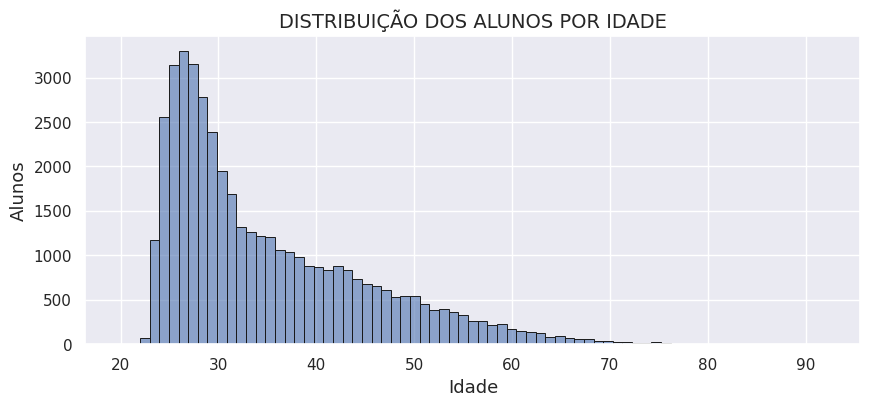

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 4))
distribuicao_idade = sns.histplot(data=df_aluno, x='IDADE',bins = 73, ec = "k", alpha = .6, palette='crest')
plt.title("DISTRIBUIÇÃO DOS ALUNOS POR IDADE", fontsize=14)
plt.xlabel("Idade", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('idades_alunos.png', transparent = True)

#3.3 Análise do perfil do aluno

In [ ]:
perfil_aluno = df_aluno[['ID_ALUNO','RACA','GENERO','IDADE']]
perfil_aluno.head()

,ID_ALUNO,RACA,GENERO,IDADE
1,1,Parda,Masculino,35
2,2,Parda,Feminino,42
3,3,Parda,Masculino,46
4,4,Parda,Masculino,32
5,5,Branca,Masculino,36


In [ ]:
perfil_genero = perfil_aluno[['GENERO', 'ID_ALUNO']].groupby('GENERO').agg(['count'])
perfil_genero

,ID_ALUNO
,count
GENERO,
Feminino,20554
Masculino,22356


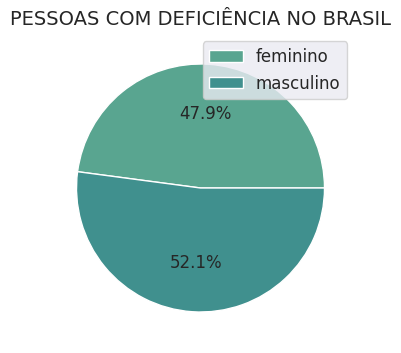

In [ ]:
plt.figure(figsize = (4,10))
brasil = [20554,(22356)]
colors = sns.color_palette("crest")[1:]
labels = 'feminino', 'masculino'
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", fontsize=14)
plt.savefig('perfil_genero.png', transparent = True)

In [ ]:
perfil_raca = perfil_aluno[['RACA', 'ID_ALUNO']].groupby('RACA').agg(['count'])
perfil_raca

,ID_ALUNO
,count
RACA,
Aluno não quis declarar cor/raça,3845
Amarela,826
Branca,18248
Indígena,273
Não dispõe da informação,76
Parda,15806
Preta,3836


In [ ]:
#Criando o dataframe
df_perfil_raca = pd.DataFrame(perfil_raca['ID_ALUNO']['count'])
df_perfil_raca.reset_index(inplace=True)
df_perfil_raca

,RACA,count
0,Aluno não quis declarar cor/raça,3845
1,Amarela,826
2,Branca,18248
3,Indígena,273
4,Não dispõe da informação,76
5,Parda,15806
6,Preta,3836


In [ ]:
#Renomeando colunas
df_perfil_raca = df_perfil_raca.rename(columns={
    'count':'ALUNOS',
})
df_perfil_raca.head(7)

,RACA,ALUNOS
0,Aluno não quis declarar cor/raça,3845
1,Amarela,826
2,Branca,18248
3,Indígena,273
4,Não dispõe da informação,76
5,Parda,15806
6,Preta,3836


In [ ]:
df_perfil_raca = df_perfil_raca
racas = {
    'Aluno não quis declarar cor/raça':'Não declarado',
    'Não dispõe da informação':'Sem informação',
    'Parda':'Parda',
    'Branca':'Branca',
    'Amarela':'Amarela',
    'Indígena':'Indígena',
    'Preta':'Preta'
}
df_perfil_raca = df_perfil_raca.astype({'RACA':str})
df_perfil_raca.RACA = df_perfil_raca.RACA.map(racas)

In [ ]:
df_perfil_raca_ordenado = df_perfil_raca.sort_values(['ALUNOS'], ascending=False)
df_perfil_raca_ordenado

,RACA,ALUNOS
2,Branca,18248
5,Parda,15806
0,Não declarado,3845
6,Preta,3836
1,Amarela,826
3,Indígena,273
4,Sem informação,76


<ipython-input-157-ddea931578a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])


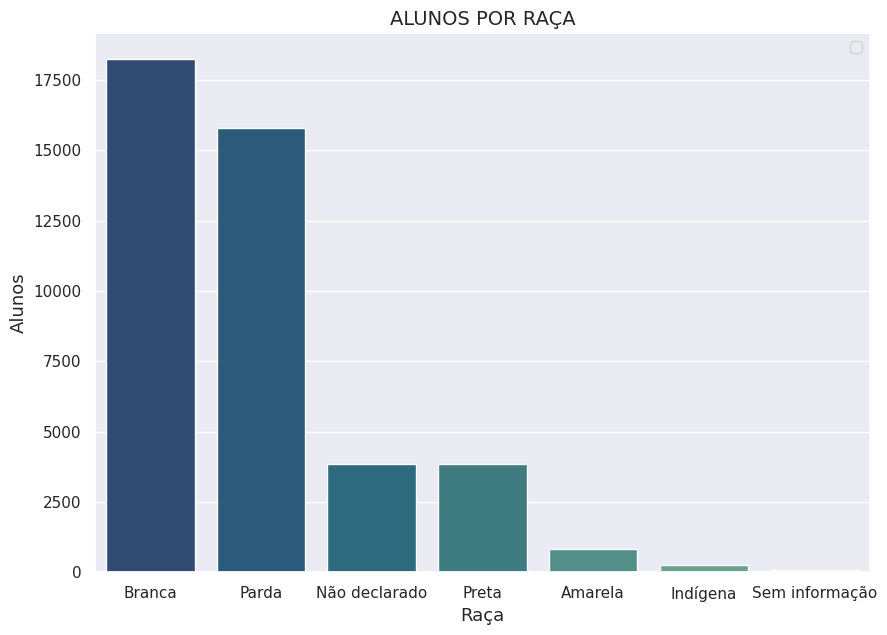

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])
plt.title("ALUNOS POR RAÇA", fontsize=14)
plt.legend()
plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_raca.png', transparent = True)

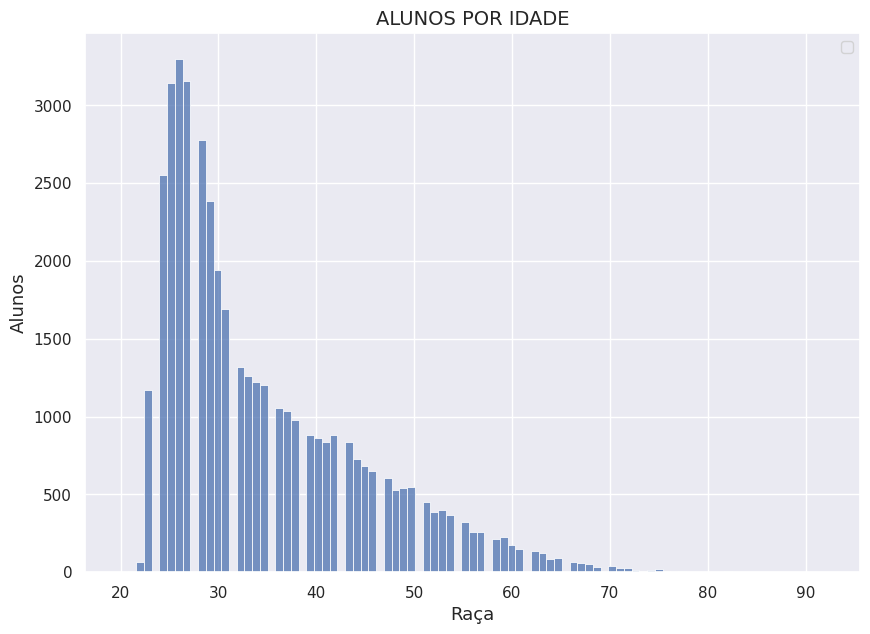

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
#sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])
sns.histplot(data=perfil_aluno, x='IDADE')
plt.title("ALUNOS POR IDADE", fontsize=14)
plt.legend()
plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_idade.png', transparent = True)

In [ ]:
perfil_aluno.describe()

,ID_ALUNO,IDADE
count,42910.000000,42910.000000
mean,21455.500000,34.655791
std,12387.194362,10.280933
min,1.000000,20.000000
25%,10728.250000,27.000000
50%,21455.500000,31.000000
75%,32182.750000,41.000000
max,42910.000000,92.000000


In [ ]:
#Intervalo de confiança
a = perfil_aluno['IDADE']
mean, sigma = np.mean(a), np.std(a)

conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int

(14.50576662208768, 54.80581575964152)

#3.4 Analisando os alunos que ingressaram na IES sem ser em vagas reservadas para alunos com deficiência

In [ ]:
df_aluno.loc[df_aluno['INGRESSO_RESERVA_DEFICIENCIA'] == 'Não'].count

<bound method DataFrame.count of        ID_ALUNO  CODIGO_IES  CODIGO_CURSO                              RACA  \
6             6           1             1                             Parda   
11           11           1             3                             Parda   
27           27           1             9                            Branca   
59           59           1            23                             Parda   
60           60           1            23                             Parda   
...         ...         ...           ...                               ...   
42632     42632       18506       1276404                             Parda   
42635     42635       18506       1276409                             Parda   
42637     42637       18506       1276410                             Preta   
42655     42655       18506       5000732  Aluno não quis declarar cor/raça   
42801     42801       21088       1332568                            Branca   

      PAIS_ORIGEM     GENERO  ANO_NASCIMENTO VINCULO_CURSO  \
6          Brasil  Masculino            1984      Cursando   
11         Brasil  Masculino            1999      Cursando   
27         Brasil   Feminino            1992      Cursando   
59         Brasil   Feminino            1977      Cursando   
60         Brasil   Feminino            1998      Cursando   
...           ...        ...             ...           ...   
42632      Brasil   Feminino            1994      Cursando   
42635      Brasil   Feminino            1995      Cursando   
42637      Brasil   Feminino            2001      Cursando   
42655      Brasil  Masculino            2001      Cursando   
42801      Brasil  Masculino            1977      Cursando   

      INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  ...  \
6                              Não              Não  ...   
11                             Não              Não  ...   
27                             Não              Não  ...   
59                             Não              Não  ...   
60                             Não              Não  ...   
...                            ...              ...  ...   
42632                          Não              Não  ...   
42635                          Não              Não  ...   
42637                          Não              Não  ...   
42655                          Não              Não  ...   
42801                          Não              Não  ...   

       IN_DEFICIENCIA_SURDOCEGUEIRA  IN_DEFICIENCIA_BAIXA_VISAO  \
6                               0.0                         0.0   
11                              0.0                         0.0   
27                              0.0                         1.0   
59                              0.0                         0.0   
60                              0.0                         0.0   
...                             ...                         ...   
42632                           0.0                         0.0   
42635                           0.0                         0.0   
42637                           0.0                         0.0   
42655                           0.0                         0.0   
42801                           0.0                         1.0   

       IN_DEFICIENCIA_CEGUEIRA  IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  \
6                          0.0                          0.0             0.0   
11                         0.0                          0.0             0.0   
27                         0.0                          0.0             0.0   
59                         0.0                          0.0             0.0   
60                         0.0                          0.0             0.0   
...                        ...                          ...             ...   
42632                      0.0                          0.0             0.0   
42635                      1.0                          0.0             0.0   
42637                      1.0      

Podemos perceber que a maioria dos alunos com deficiência matriculados no ensino superior, 63747, ou seja, 95,41% ingressam nos cursos por meio de cotas reservadas a pessoas com deficiência. Apenas 4,59% ingressam ser ser por cotas reservadas.

#3.5 Analisando a quantidade de alunos com deficiência nos cursos

Calculando a quantidade de alunos com deficiência por curso

In [ ]:
#Agrupando os dados de aluno e curso
df_alunos_deficiencia = pd.merge(df_aluno, df_curso, how='inner', on='CODIGO_CURSO')
df_alunos_deficiencia.head()

,ID_ALUNO,CODIGO_IES_x,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,...,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
2,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
3,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
4,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75


In [ ]:
#Calculando a quantidade total de alunos por deficiência
IN_DEFICIENCIA_AUDITIVA = df_alunos_deficiencia['IN_DEFICIENCIA_AUDITIVA'].sum()
IN_DEFICIENCIA_FISICA = df_alunos_deficiencia['IN_DEFICIENCIA_FISICA'].sum()
IN_DEFICIENCIA_INTELECTUAL = df_alunos_deficiencia['IN_DEFICIENCIA_INTELECTUAL'].sum()
IN_DEFICIENCIA_MULTIPLA = df_alunos_deficiencia['IN_DEFICIENCIA_MULTIPLA'].sum()
IN_DEFICIENCIA_SURDEZ = df_alunos_deficiencia['IN_DEFICIENCIA_SURDEZ'].sum()
IN_DEFICIENCIA_SURDOCEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_SURDOCEGUEIRA'].sum()
IN_DEFICIENCIA_BAIXA_VISAO = df_alunos_deficiencia['IN_DEFICIENCIA_BAIXA_VISAO'].sum()
IN_DEFICIENCIA_CEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_CEGUEIRA'].sum()
IN_DEFICIENCIA_SUPERDOTACAO = df_alunos_deficiencia['IN_DEFICIENCIA_SUPERDOTACAO'].sum()
IN_TGD_AUTISMO = df_alunos_deficiencia['IN_TGD_AUTISMO'].sum()
IN_TGD_SINDROME_ASPERGER = df_alunos_deficiencia['IN_TGD_SINDROME_ASPERGER'].sum()
IN_TGD_SINDROME_RETT = df_alunos_deficiencia['IN_TGD_SINDROME_RETT'].sum()
IN_TGD_TRANSTOR_DESINTEGRATIVO = df_alunos_deficiencia['IN_TGD_TRANSTOR_DESINTEGRATIVO'].sum()

In [ ]:
#Criando um dicionário, onde cada chave representa uma coluna
tipo_deficiencia = {
'TIPO_DEFICIENCIA': ['IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'],
'ALUNOS': [IN_DEFICIENCIA_AUDITIVA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_INTELECTUAL, IN_DEFICIENCIA_MULTIPLA, IN_DEFICIENCIA_SURDEZ, IN_DEFICIENCIA_SURDOCEGUEIRA, IN_DEFICIENCIA_BAIXA_VISAO, IN_DEFICIENCIA_CEGUEIRA, IN_DEFICIENCIA_SUPERDOTACAO, IN_TGD_AUTISMO, IN_TGD_SINDROME_ASPERGER, IN_TGD_SINDROME_RETT, IN_TGD_TRANSTOR_DESINTEGRATIVO],
}
#Criando o dataframe
deficiencias = pd.DataFrame(tipo_deficiencia, columns=['TIPO_DEFICIENCIA','ALUNOS'])
deficiencias

,TIPO_DEFICIENCIA,ALUNOS
0,IN_DEFICIENCIA_AUDITIVA,5707.0
1,IN_DEFICIENCIA_FISICA,14429.0
2,IN_DEFICIENCIA_INTELECTUAL,3841.0
3,IN_DEFICIENCIA_MULTIPLA,675.0
4,IN_DEFICIENCIA_SURDEZ,2311.0
5,IN_DEFICIENCIA_SURDOCEGUEIRA,144.0
6,IN_DEFICIENCIA_BAIXA_VISAO,12327.0
7,IN_DEFICIENCIA_CEGUEIRA,2260.0
8,IN_DEFICIENCIA_SUPERDOTACAO,1365.0
9,IN_TGD_AUTISMO,847.0


In [ ]:
deficiencias_ordenado = deficiencias.sort_values(['ALUNOS'], ascending=False)
deficiencias_ordenado

,TIPO_DEFICIENCIA,ALUNOS
1,IN_DEFICIENCIA_FISICA,14429.0
6,IN_DEFICIENCIA_BAIXA_VISAO,12327.0
0,IN_DEFICIENCIA_AUDITIVA,5707.0
2,IN_DEFICIENCIA_INTELECTUAL,3841.0
4,IN_DEFICIENCIA_SURDEZ,2311.0
7,IN_DEFICIENCIA_CEGUEIRA,2260.0
8,IN_DEFICIENCIA_SUPERDOTACAO,1365.0
9,IN_TGD_AUTISMO,847.0
3,IN_DEFICIENCIA_MULTIPLA,675.0
10,IN_TGD_SINDROME_ASPERGER,534.0


<ipython-input-166-161671c723e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  defic = sns.barplot(x='ALUNOS', y='TIPO_DEFICIENCIA', data=deficiencias_ordenado, palette='crest_r')


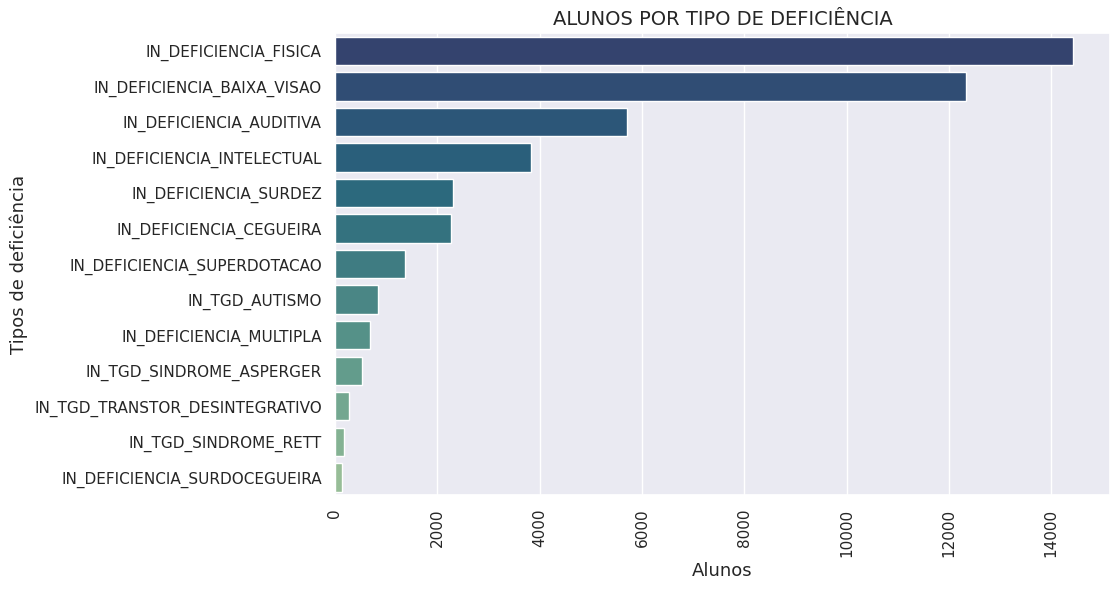

In [ ]:
#Visualizando os tipos de deficiência dos alunos em  2019
plt.figure(figsize=(10,6))
defic = sns.barplot(x='ALUNOS', y='TIPO_DEFICIENCIA', data=deficiencias_ordenado, palette='crest_r')
plt.xticks(rotation=90)
defic.set_title('ALUNOS POR TIPO DE DEFICIÊNCIA', fontsize = 14)
defic.set_xlabel('Alunos',fontsize = 13), defic.set_ylabel('Tipos de deficiência',fontsize=13)
plt.savefig('alunos_por_deficiencia.png', transparent = True)

#3.6 Analisando a quantidade de deficientes por grande área de formação

In [ ]:
df_info_curso = pd.read_csv('SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NO_CURSO', 'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL'])
df_info_curso['NUM_DE_CURSOS'] = 1
df_info_curso = df_info_curso.groupby('NO_CURSO').sum().reset_index()
df_info_curso = df_info_curso.rename(columns={'NO_CURSO': 'NOME_CURSO', 'QT_MATRICULA_TOTAL': 'NUM_ALUNOS_MATRICULADOS', 'QT_CONCLUINTE_TOTAL': 'NUM_ALUNOS_CONCLUINTES'})
df_info_curso

,NOME_CURSO,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,NUM_DE_CURSOS
0,ABI - ARTES CÊNICAS,186,0,4
1,ABI - ARTES PLÁSTICAS,50,0,1
2,ABI - ARTES VISUAIS,464,0,5
3,ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA,0,0,1
4,ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA,133,0,1
...,...,...,...,...
1242,VITICULTURA E ENOLOGIA,392,48,5
1243,WEB DESIGN E PROGRAMAÇÃO,5,0,1
1244,"YOGA, ÊNFASE EM YOGATERAPIA",33,5,1
1245,ZOOTECNIA,20500,1927,119


In [ ]:
df_curso_deficiencia = df_alunos_deficiencia[['NOME_IES', 'NOME_CURSO', 'AREA_FORMACAO']]
df_curso_deficiencia['NUM_ALUNOS_DEFICIENTES'] = 1
df_curso_deficiencia = df_curso_deficiencia.groupby(by=['NOME_CURSO', 'AREA_FORMACAO']).sum().reset_index()
df_curso_deficiencia = pd.merge(df_curso_deficiencia, df_info_curso, how='inner', on='NOME_CURSO')
df_arealuno = df_curso_deficiencia.groupby(by=['AREA_FORMACAO']).sum()
df_arealuno['MEDIA_QNT_ALUNO_CURSO'] = df_arealuno['NUM_ALUNOS_DEFICIENTES'] / df_arealuno['NUM_DE_CURSOS']
df_arealuno

<ipython-input-168-2b347e07f5ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curso_deficiencia['NUM_ALUNOS_DEFICIENTES'] = 1


,NOME_CURSO,NOME_IES,NUM_ALUNOS_DEFICIENTES,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,NUM_DE_CURSOS,MEDIA_QNT_ALUNO_CURSO
AREA_FORMACAO,,,,,,,
"Agricultura, Veterinária, Recursos florestais e pesqueiros",AGROECOLOGIAAGROINDÚSTRIAAGRONEGÓCIOAGRONOMIAA...,UNIVERSIDADE ESTADUAL DE GOIÁSUNIVERSIDADE EST...,1445,275188,32350,1282,1.127145
Artes e Humanidades,ANIMAÇÃOARQUEOLOGIAARQUEOLOGIA E PRESERVAÇÃO P...,UNIVERSIDADE FEDERAL DE SANTA CATARINAUNIVERSI...,1119,463720,68038,3359,0.333135
"Ciências Sociais, Jornalismo e Informação",ANTROPOLOGIAANTROPOLOGIA - DIVERSIDADE CULTURA...,UNIVERSIDADE FEDERAL DE MINAS GERAISUNIVERSIDA...,3016,525190,72278,2511,1.201115
"Ciências naturais, Matemática e Estatística",BIOLOGIABIOQUÍMICABIOTECNOLOGIABIOTECNOLOGIA I...,UNIVERSIDADE ESTADUAL DA PARAÍBAUNIVERSIDADE E...,737,355234,41314,2686,0.274386
Educação,ARTE EDUCAÇÃOARTESARTES CÊNICASARTES PLÁSTICAS...,UNIVERSIDADE DO PLANALTO CATARINENSEUNIVERSIDA...,9649,2360697,340418,10660,0.905159
"Engenharia, Produção e Construção",ALIMENTOSANÁLISE DE PROCESSOS AGROINDUSTRIAISA...,UNIVERSIDADE ESTADUAL DE CIÊNCIAS DA SAÚDE DE ...,4838,1145450,166810,6801,0.711366
"Negócios, Administração e Direito",ADMINISTRAÇÃOADMINISTRAÇÃO DE EMPRESASADMINIST...,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,11829,2642550,418346,10352,1.142678
Saúde e Bem-estar,BIOMEDICINACIÊNCIAS BIOMÉDICASCIÊNCIAS BIOMÉDI...,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,7028,1750613,234263,6968,1.008611
Serviços,CIÊNCIAS AERONÁUTICASCIÊNCIAS MILITARESEMBELEZ...,UNIVERSIDADE ESTÁCIO DE SÁUNIVERSIDADE PITÁGOR...,718,181046,30225,1172,0.612628


<ipython-input-169-a6d951875cf4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  df_arealuno_plot = sns.barplot(x='MEDIA_QNT_ALUNO_CURSO', y='AREA_FORMACAO', data=top10, palette="crest_r")


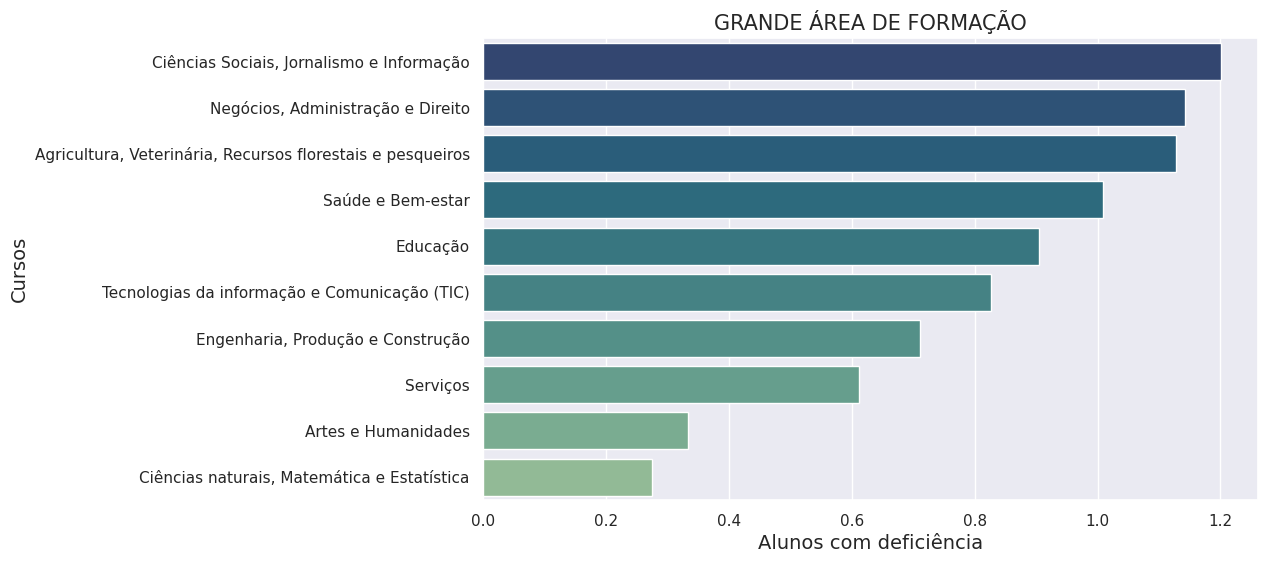

In [ ]:
top10 = df_arealuno.sort_values('MEDIA_QNT_ALUNO_CURSO', ascending=False).reset_index()
plt.figure(figsize=(10,6))
df_arealuno_plot = sns.barplot(x='MEDIA_QNT_ALUNO_CURSO', y='AREA_FORMACAO', data=top10, palette="crest_r")
df_arealuno_plot.set_title('GRANDE ÁREA DE FORMAÇÃO', fontsize = 15)
df_arealuno_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_arealuno_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('alunos_por_area_formacao.png', transparent = True)

#3.7 Analisando os recursos de acessibilidade disponíveis por curso

In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso['RECURSOS'] = df_curso.apply(contar_recursos, axis=1)
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,...,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32,1.0


Filtrando os dados para analisar apenas os cursos que estão "em atividade"


In [ ]:
df_curso = df_curso.loc[df_curso['SITUACAO'] == 'Em atividade']
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,...,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32,1.0


Analisando por quantidade de recursos disponíveis

In [ ]:
area_formacao = df_curso[['AREA_FORMACAO','RECURSOS']].groupby('AREA_FORMACAO').agg(['mean','count'])
area_formacao

RECURSOS      
                                                        mean count
AREA_FORMACAO                                                     
Agricultura, Veterinária, Recursos florestais e...  6.591781  1095
Artes e Humanidades                                 7.563851  1527
Ciências Sociais, Jornalismo e Informação           7.420914  1903
Ciências naturais, Matemática e Estatística         7.494792   768
Educação                                            6.606715  6672
Engenharia, Produção e Construção                   7.135211  5680
Negócios, Administração e Direito                   7.042958  9451
Saúde e Bem-estar                                   7.222015  5896
Serviços                                            7.515888  1070
Tecnologias da informação e Comunicação (TIC)       7.169811  2332

In [ ]:
recursos_por_cursos = df_curso[['NOME_CURSO','RECURSOS']].groupby('NOME_CURSO').agg(['mean', 'count'])
recursos_por_cursos

RECURSOS      
                                               mean count
NOME_CURSO                                               
ABI - ARTES CÊNICAS                        9.000000     3
ABI - ARTES PLÁSTICAS                     12.000000     1
ABI - ARTES VISUAIS                        8.000000     2
ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA     6.000000     1
ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA   6.000000     1
...                                             ...   ...
VISAGISMO E TERAPIAS CAPILARES            12.000000     1
VITICULTURA E ENOLOGIA                     5.250000     4
YOGA, ÊNFASE EM YOGATERAPIA                6.000000     1
ZOOTECNIA                                  6.262136   103
ÓPTICA E OPTOMETRIA                        7.000000     2

[1193 rows x 2 columns]

In [ ]:
grau_academico = df_curso[['TIPO_GRAU_ACADEMICO','RECURSOS']].groupby('TIPO_GRAU_ACADEMICO').agg(['mean','count'])
grau_academico

RECURSOS       
                         mean  count
TIPO_GRAU_ACADEMICO                 
Bacharelado          7.181194  22280
Licenciatura         6.602466   6651
Tecnológico          7.134597   7437

In [ ]:
modalidade_ensino = df_curso[['MODALIDADE_ENSINO','RECURSOS']].groupby('MODALIDADE_ENSINO').agg(['mean','count'])
modalidade_ensino

RECURSOS       
                       mean  count
MODALIDADE_ENSINO                 
Curso a distância  7.693090   4226
Presencial         6.991103  32371

#3.8 Analisando a correlação entre recursos e alunos com deficiência por curso

In [ ]:
df_recursos = df_curso[['NOME_CURSO', 'RECURSOS']]
df_recursos = df_recursos.groupby('NOME_CURSO').sum().reset_index()
df_recurso_curso = pd.merge(df_curso_deficiencia, df_recursos, how='inner', on='NOME_CURSO')
df_recurso_curso = df_recurso_curso.drop(['AREA_FORMACAO'], axis=1)
df_recurso_curso

,NOME_CURSO,NOME_IES,NUM_ALUNOS_DEFICIENTES,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,NUM_DE_CURSOS,RECURSOS
0,ADMINISTRAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,2778,643627,91620,2317,14366.0
1,ADMINISTRAÇÃO DE EMPRESAS,FACULDADE DE CIÊNCIAS APLICADAS E SOCIAIS DE P...,6,1942,299,7,23.0
2,ADMINISTRAÇÃO EM SISTEMAS E SERVIÇOS DE SAÚDE,UNIVERSIDADE ESTADUAL DO RIO GRANDE DO SUL,1,136,1,1,0.0
3,ADMINISTRAÇÃO PÚBLICA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,176,17381,1519,74,351.0
4,ADMINISTRAÇÃO PÚBLICA E POLÍTICAS PÚBLICAS,UNIVERSIDADE FEDERAL DA INTEGRAÇÃO LATINO-AMER...,3,166,5,1,7.0
...,...,...,...,...,...,...,...
639,TURISMO,UNIVERSIDADE DE BRASÍLIAUNIVERSIDADE FEDERAL D...,56,13016,1613,162,829.0
640,TURISMO PATRIMONIAL E SOCIOAMBIENTAL,FUNDAÇÃO UNIVERSIDADE FEDERAL DO TOCANTINSFUND...,2,114,3,1,12.0
641,VITICULTURA E ENOLOGIA,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",5,392,48,5,21.0
642,ZOOTECNIA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,127,20500,1927,119,645.0


In [ ]:
df_recurso_curso.corr()

ValueError: could not convert string to float: 'ADMINISTRAÇÃO'

Percebe-se que existe uma alta correlação entre o numero de alunos com deficiência em relação aos cursos

In [ ]:
df_recurso_curso = df_recurso_curso.sort_values('NUM_ALUNOS_DEFICIENTES', ascending=False)
top10 = df_recurso_curso.head(10)
top10

,NOME_CURSO,NOME_IES,NUM_ALUNOS_DEFICIENTES,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,NUM_DE_CURSOS,RECURSOS
160,DIREITO,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,4308,829487,120936,1568,10486.0
536,PEDAGOGIA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,3263,813230,123970,1800,11081.0
0,ADMINISTRAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,2778,643627,91620,2317,14366.0
569,PSICOLOGIA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,1782,270684,37635,927,6452.0
82,CIÊNCIAS CONTÁBEIS,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,1368,358173,49930,1554,10149.0
502,MEDICINA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,1355,187710,20316,339,2252.0
191,ENFERMAGEM,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,1223,326055,41217,1112,7285.0
208,ENGENHARIA CIVIL,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,1089,273778,48564,1135,7621.0
426,LETRAS - LIBRAS,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,988,9977,296,38,260.0
177,EDUCAÇÃO FÍSICA,UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...,795,374787,57667,1501,10203.0


<ipython-input-180-a2d1a5e9ce8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  df_recurso_curso_plot = sns.barplot(x='NUM_ALUNOS_DEFICIENTES', y='NOME_CURSO', data=top10, palette="crest_r")


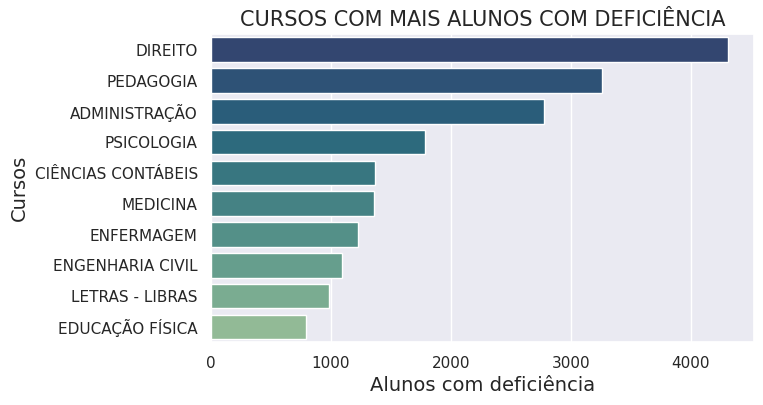

In [ ]:
plt.figure(figsize=(7,4))
df_recurso_curso_plot = sns.barplot(x='NUM_ALUNOS_DEFICIENTES', y='NOME_CURSO', data=top10, palette="crest_r")
df_recurso_curso_plot.set_title('CURSOS COM MAIS ALUNOS COM DEFICIÊNCIA', fontsize = 15)
df_recurso_curso_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_recurso_curso_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('curso_mais_alunos.png', transparent = True)

#3.9 Analisando os tipos de deficiência por IES

In [ ]:
#Filtrando apenas as IES públicas
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_e_ies_publico = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_e_ies_publico.loc[(df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_curso_e_ies_publico['RECURSOS'] = df_curso_e_ies_publico.apply(contar_recursos, axis=1)
df_curso_e_ies_publico.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,...,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,0,0,0,0,0,1.0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,1,0,0,0,0,0,NaN
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,1,2,0,0,0,0,0,9.0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,0,0,0,0,0,1.0


In [ ]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

,ALUNOS_COM_DEFICIENCIA
SIGLA_IES,
AMAN,1
CEFET/MG,13
CEFET/RJ,13
EEP/FUMEP,0
EG,8
...,...
USJ,0
USP,51
UTFPR,38


In [ ]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [ ]:
#Visualizando o dataframe com filtro da UFPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFPE']

,ALUNOS_COM_DEFICIENCIA,SIGLA_IES
217,167,UFRPE


<ipython-input-186-f051eefd0ea3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r')


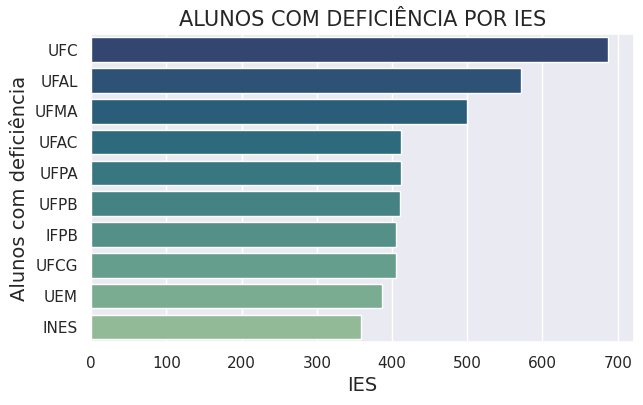

In [ ]:
#Visualizando
plt.figure(figsize=(7,4))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r')
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 15)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 14), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('alunos_por_ies.png', transparent = True)

#3.10 Analisando a quantidade de recursos de acessibilidade por IES

In [ ]:
#Agrupando os recursos disponibilizados por IES
relacao = df_curso.groupby(['SIGLA_IES'])['RECURSOS'].sum().reset_index()
relacao.head()
relacao.loc[relacao['SIGLA_IES'] == 'UFRPE']

,SIGLA_IES,RECURSOS
1501,UFRPE,166.0


In [ ]:
#Transformando em um dataframe
df_recursos_ies = relacao
df_recursos_ies.index = range(len(df_recursos_ies.index))
df_recursos_ies.sort_values(by='RECURSOS', ascending=False, inplace=True)
df_recursos_ies

,SIGLA_IES,RECURSOS
1689,UNIP,10207.0
1538,UNESA,2987.0
1685,UNINOVE,2547.0
1426,UAM,2172.0
1018,FMU,2016.0
...,...,...
1441,UEA,0.0
564,FAOA,0.0
1181,IECEMB - FAB,0.0
558,FANET,0.0


In [ ]:
#Unindo as informações sobre recursos nas IES

df_recursos = df_recursos_ies.join(df_pcd_ies_publica.set_index('SIGLA_IES'), on='SIGLA_IES')
df_recursos.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)
df_recursos.head()

,SIGLA_IES,RECURSOS,ALUNOS_COM_DEFICIENCIA
1470,UFC,464.0,687.0
1467,UFAL,430.0,571.0
1482,UFMA,734.0,500.0
1490,UFPA,962.0,412.0
1466,UFAC,160.0,412.0


<ipython-input-190-85e9d47e3919>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos, palette='crest')


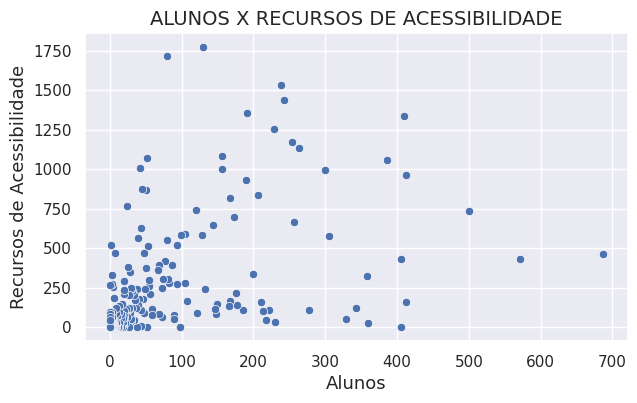

In [ ]:
#Visualizando a relação alunos com deficiência e recursos disponíveis pelas IES públicas
plt.figure(figsize=(7,4))
relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos, palette='crest')
relacao_plot.set_title('ALUNOS X RECURSOS DE ACESSIBILIDADE', fontsize = 14)
relacao_plot.set_xlabel('Alunos',fontsize = 13), relacao_plot.set_ylabel('Recursos de Acessibilidade',fontsize=13)
plt.savefig('relacao_alunos_recursos.png', transparent = True)

Pelo gráfico acima percebemos que não conseguimos enxergar uma relação entre a quantidade de recursos ofertados com a quantidades de alunos com deficiência nas IES de ensino público.

In [ ]:
df_a = df_alunos_deficiencia[['NOME_IES']]
df_a['NUM_ALUNOS_DEFICIENTES'] = 1
df_a = df_a.groupby('NOME_IES').sum().reset_index()
df_b = df_curso[['NOME_IES', 'NOME_CURSO', 'NUM_ALUNOS_MATRICULADOS', 'NUM_ALUNOS_CONCLUINTES', 'RECURSOS']]
df_b['NUM_TOTAL_CURSOS'] = 1
df_b = df_b.groupby('NOME_IES').sum().reset_index()
df_recursos_por_ies = pd.merge(df_a, df_b, how='inner', on='NOME_IES')
df_recursos_por_ies
#df_teste

<ipython-input-193-2f01584cb9e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['NUM_ALUNOS_DEFICIENTES'] = 1
<ipython-input-193-2f01584cb9e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['NUM_TOTAL_CURSOS'] = 1


,NOME_IES,NUM_ALUNOS_DEFICIENTES,NOME_CURSO,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES,RECURSOS,NUM_TOTAL_CURSOS
0,ABEU - CENTRO UNIVERSITÁRIO,3,ADMINISTRAÇÃOCIÊNCIAS CONTÁBEISADMINISTRAÇÃOAD...,3441,909,12.0,17
1,AJES - FACULDADE DO VALE DO JURUENA,2,CIÊNCIAS CONTÁBEISADMINISTRAÇÃODIREITOPSICOLOG...,585,106,7.0,7
2,ALFA - Faculdade de Almenara,3,ENFERMAGEMFARMÁCIAENGENHARIA CIVILADMINISTRAÇÃ...,1495,146,6.0,6
3,Academia Militar das Agulhas Negras,1,CIÊNCIAS MILITARES,2167,460,0.0,1
4,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE,9,LETRASHISTÓRIABIOLOGIAGEOGRAFIAMATEMÁTICAPEDAG...,1081,197,9.0,9
...,...,...,...,...,...,...,...
1367,Universidade Estadual do Norte do Paraná,28,EDUCAÇÃO FÍSICAAGRONOMIAADMINISTRAÇÃOCIÊNCIAS ...,4851,881,347.0,29
1368,Universidade Estadual do Paraná,27,ADMINISTRAÇÃOCIÊNCIAS CONTÁBEISENFERMAGEMLETRA...,9520,1386,113.0,72
1369,Universidade Universus Veritas Guarulhos,13,PEDAGOGIAPSICOLOGIAENFERMAGEMDESIGNARQUITETURA...,14059,2796,177.0,100
1370,Universidade do Estado de Mato Grosso Carlos A...,31,LETRASPEDAGOGIAHISTÓRIAGEOGRAFIAMATEMÁTICACIÊN...,19293,2174,230.0,95


In [ ]:
#Criando grafico de correlação no dataframe de recursos por ies
plt.figure(figsize=(10,4))
corr = df_recursos_por_ies.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('MATRIZ DE CORRELAÇÃO', fontsize = 15)
#ax.set_xlabel('IES',fontsize = 14), ax.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('matriz_correlacao_eda.png', transparent = True)

ValueError: could not convert string to float: 'ABEU - CENTRO UNIVERSITÁRIO'

<Figure size 1000x400 with 0 Axes>

Percebe-se pelo grafico de correlação que a quantidade de alunos com deficiencia tem uma correlação mediana com a quantidade de recursos oferecidas pelas IES

In [ ]:
#Filtrando apenas as IES públicas
df_curso_publico = pd.read_csv('dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual')]
df_curso_e_ies_publico.head()
#df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,...,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,0,0,0,0,0,0
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,1,0,0,0,0,0
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,0,0,0,0,0,0,0
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,0,0,0,1,2,0,0,0,0,0
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

SIGLA_IES
AMAN          1
CEFET/MG     13
CEFET/RJ     13
EEP/FUMEP     0
EG            8
             ..
USJ           0
USP          51
UTFPR        38
UVA          50
UnirG         8
Name: ALUNOS_COM_DEFICIENCIA, Length: 268, dtype: int64

In [ ]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [ ]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFRPE']

,ALUNOS_COM_DEFICIENCIA,SIGLA_IES
217,167,UFRPE


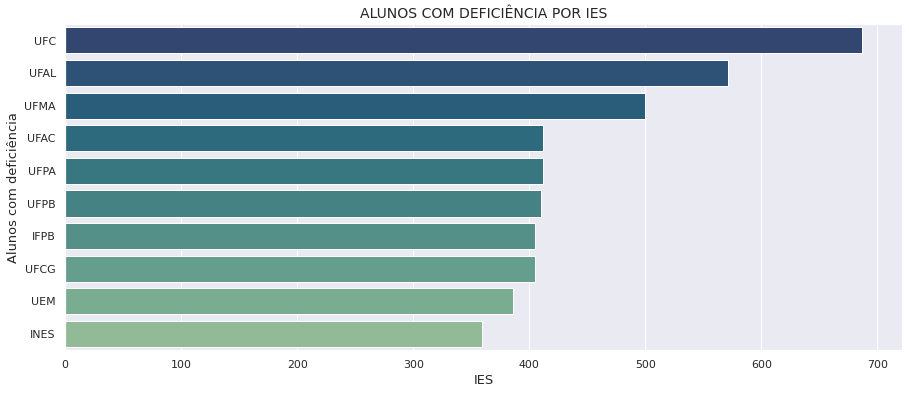

In [ ]:
#Visualizando
plt.figure(figsize =(15, 6))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r')
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=13)
plt.savefig('alunos_ies.png', transparent = True)



#3.11 Analisando a quantidade de deficientes por categoria administrativa

<ipython-input-198-84e7d73bc491>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ies_publica_federal = sns.catplot(x='TIPO_CATEGORIA_ADM', y='ALUNOS_COM_DEFICIENCIA', data=df_curso_e_ies_publico, palette='crest')


<Figure size 1200x200 with 0 Axes>

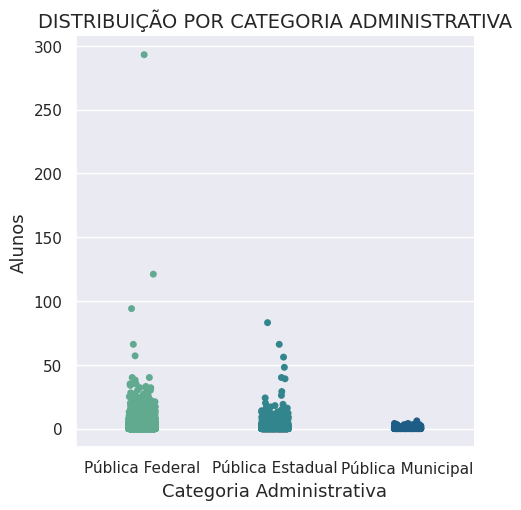

In [ ]:
#Gráfico categórico Catplot
plt.figure(figsize =(12, 2))
ies_publica_federal = sns.catplot(x='TIPO_CATEGORIA_ADM', y='ALUNOS_COM_DEFICIENCIA', data=df_curso_e_ies_publico, palette='crest')
plt.title("DISTRIBUIÇÃO POR CATEGORIA ADMINISTRATIVA", fontsize=14)
plt.xlabel('Categoria Administrativa', fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('alunos_por_categoriaadm.png', transparent = True)

Mas conseguimos perceber que os alunos com deficiência estão mais concentrados nas IES públicas federais.

#3.12 Análise dos alunos concluintes no Ensino Superior

In [ ]:
import pandas as pd
#Importando os dados de concluintes de 2019
alunos_2019 = pd.read_csv('dados/alunodeficiente_2019.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2019 = alunos_2019.loc[alunos_2019['IN_CONCLUINTE'] == 1]
alunos_2019.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [ ]:
#Importando os dados de concluintes de 2018
alunos_2018 = pd.read_csv('dados/alunodeficiente_2018.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2018 = alunos_2018.loc[alunos_2018['IN_CONCLUINTE'] == 1]
alunos_2018.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
3,2018,1,76445978,3,2,1995,1,2014
12,2018,6,76472979,3,1,1990,1,2014
23,2018,8,76479389,2,2,1968,1,2016
57,2018,21,76484150,1,1,1993,1,2014
85,2018,22837,76495920,3,1,1995,1,2015


In [ ]:
#Importando os dados de concluintes de 2017
alunos_2017 = pd.read_csv('dados/alunodeficiente_2017.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO','NU_ANO_CENSO'])
alunos_2017 = alunos_2017.loc[alunos_2017['IN_CONCLUINTE'] == 1]
alunos_2017.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
4,2017,2,48734293,1,1,1989,1,2014
48,2017,41673,48741262,3,1,1975,1,2014
99,2017,117004,48739644,3,2,1990,1,2012
119,2017,1103426,48765021,2,2,1982,1,2012
156,2017,1205603,48754027,3,1,1989,1,2014


In [ ]:
#Juntando os dados de 2017 a 2019
anos = [alunos_2019, alunos_2018, alunos_2017]
df_concluintes_parcial = pd.concat(anos)
df_concluintes_parcial.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [ ]:
df_concluintes_parcial = df_concluintes_parcial.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [ ]:
#Importando os dados de concluintes de 2016
alunos_2016 = pd.read_csv('dados/alunodeficiente_2016.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2016 = alunos_2016.loc[alunos_2016['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2016['NU_ANO_CENSO']=2016
alunos_2016.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
22,116,13069741,3,0,1990,1,2011,2016
25,119,13073087,1,0,1993,1,2010,2016
38,135,12381872,1,1,1989,1,2009,2016
39,135,13065287,1,1,1989,1,2010,2016
45,136,13071528,3,0,1987,1,2010,2016


In [ ]:
#Importando os dados de concluintes de 2015
alunos_2015 = pd.read_csv('dados/alunodeficiente_2015.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2015 = alunos_2015.loc[alunos_2015['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2015['NU_ANO_CENSO']=2015
alunos_2015.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
53,122200,20404275,3,1,1988,1,2011,2015
58,300151,12631680,0,0,1989,1,2008,2015
66,160,13795351,3,0,1987,1,2013,2015
67,34642,20403767,1,0,1989,1,2007,2015
80,18032,9483270,3,0,1985,1,2012,2015


In [ ]:
#Importando os dados de concluintes de 2014
alunos_2014 = pd.read_csv('dados/alunodeficiente_2014.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2014 = alunos_2014.loc[alunos_2014['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2014['NU_ANO_CENSO']=2014
alunos_2014.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
43,145,8490077,3,0,1988,1,2009,2014
64,156,8554999,3,1,1991,1,2011,2014
88,167,8446376,4,0,1991,1,2009,2014
102,303,20290999,1,1,1981,1,2010,2014
107,304,20315417,3,1,1990,1,2009,2014


In [ ]:
#Importando os dados de concluintes de 2013
alunos_2013 = pd.read_csv('dados/alunodeficiente_2013.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2013 = alunos_2013.loc[alunos_2013['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2013['NU_ANO_CENSO']=2013
alunos_2013.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
1,8,22606124,1,0,1989,1,2007,2013
33,137,8183326,0,0,1990,1,2007,2013
36,138,8204517,6,0,1980,1,1998,2013
137,300,7626956,4,0,1982,1,2008,2013
161,315,7633903,3,1,1983,1,2009,2013


In [ ]:
#Importando os dados de concluintes de 2012
alunos_2012 = pd.read_csv('dados/alunodeficiente_2012.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2012 = alunos_2012.loc[alunos_2012['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2012['NU_ANO_CENSO']=2012
alunos_2012.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
3,20477,156255,3,1,1986,1,2007,2012
5,100547,225029,1,1,1982,1,2008,2012
31,75284,11833178,6,0,1988,1,2010,2012
32,1123238,7280581,2,0,1977,1,2010,2012
47,92951,8797596,0,1,1985,1,2009,2012


In [ ]:
#Importando os dados de concluintes de 2011
alunos_2011 = pd.read_csv('dados/alunodeficiente_2011.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2011 = alunos_2011.loc[alunos_2011['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2011['NU_ANO_CENSO']=2011
alunos_2011.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
1,51212,12461,6,1,1985,1,2007,2011
21,104958,16137,1,0,1978,1,2007,2011
24,85696,24160,6,1,1986,1,2006,2011
40,51277,28634,1,1,1987,1,2006,2011
43,116176,27774,1,0,1982,1,2010,2011


In [ ]:
#Juntando os dados de todos os anos
anos_parcial_2 = [alunos_2016, alunos_2015, alunos_2014, alunos_2013, alunos_2012, alunos_2011]
df_concluintes_parcial_2 = pd.concat(anos_parcial_2)
df_concluintes_parcial_2

NameError: name 'alunos_2013' is not defined

In [ ]:
df_concluintes_parcial_2 = df_concluintes_parcial_2.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'CO_COR_RACA_ALUNO':'RACA',
    'IN_SEXO_ALUNO':'GENERO',
    'NU_ANO_ALUNO_NASC':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial_2.head()

NameError: name 'df_concluintes_parcial_2' is not defined

In [ ]:
#Juntando os dados de todos os anos
partes = [df_concluintes_parcial,df_concluintes_parcial_2]
df_concluintes = pd.concat(partes)
df_concluintes.head()

NameError: name 'df_concluintes_parcial_2' is not defined

In [ ]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_concluintes = df_concluintes.astype({'RACA':str})
df_concluintes.RACA = df_concluintes.RACA.map(raca)
df_concluintes.head()

NameError: name 'df_concluintes' is not defined

In [ ]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_concluintes = df_concluintes.astype({'GENERO':str})
df_concluintes.GENERO = df_concluintes.GENERO.map(genero)
df_concluintes.head()

NameError: name 'df_concluintes' is not defined

In [ ]:
#Inserindo a coluna Idade
df_concluintes['IDADE']=2021-df_concluintes['DATA_NASCIMENTO']
df_concluintes.head()

NameError: name 'df_concluintes' is not defined

In [ ]:
#Inserindo o tempo de conclusão
df_concluintes = df_concluintes.rename(columns={'CONCLUINTE':'CONCLUSÃO'})
df_concluintes['CONCLUSÃO']=df_concluintes['ANO_CENSO']
df_concluintes['TEMPO_CONCLUSÃO']=df_concluintes['CONCLUSÃO']-df_concluintes['ANO_INGRESSO']+1
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUSÃO,ANO_INGRESSO,IDADE,TEMPO_CONCLUSÃO
22,2019,6,74005404,Parda,Feminino,1979,2019,2016,42,4
34,2019,7,73973642,Indígena,Feminino,1977,2019,2015,44,5
152,2019,100775,73966504,Branca,Masculino,1997,2019,2015,24,5
179,2019,116560,73961425,Preta,Masculino,1991,2019,2016,30,4
239,2019,1103426,73966379,Parda,Masculino,1969,2019,2012,52,8


In [ ]:
df_concluintes.describe()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,DATA_NASCIMENTO,CONCLUSÃO,ANO_INGRESSO,IDADE,TEMPO_CONCLUSÃO
count,40033.000000,4.003300e+04,4.003300e+04,40033.000000,40033.000000,40033.000000,40033.000000,40033.000000
mean,2015.478905,2.854052e+05,2.416646e+07,1983.700997,2015.478905,2011.794819,37.299003,4.684086
std,2.499762,5.803838e+05,1.744576e+07,9.919700,2.499762,2.982482,9.919700,1.784711
min,2011.000000,1.000000e+00,3.170000e+02,1926.000000,2011.000000,1982.000000,21.000000,1.000000
25%,2013.000000,2.840800e+04,1.235078e+07,1978.000000,2013.000000,2010.000000,30.000000,4.000000
50%,2016.000000,8.964400e+04,1.941763e+07,1986.000000,2016.000000,2012.000000,35.000000,5.000000
75%,2018.000000,1.145640e+05,2.887949e+07,1991.000000,2018.000000,2014.000000,43.000000,6.000000
max,2019.000000,5.001412e+06,7.900380e+07,2000.000000,2019.000000,2019.000000,95.000000,34.000000


In [ ]:
#Somando os concluintes por ano
df_concluintes_por_ano = pd.DataFrame(columns=['ANO_CENSO'])
df_concluintes_por_ano['ANO_CENSO'] = df_concluintes['ANO_CENSO'].unique()
df_concluintes_por_ano

,ANO_CENSO
0,2019
1,2018
2,2017
3,2016
4,2015
5,2014
6,2013
7,2012
8,2011


In [ ]:
def contar_concluintes(row):
  df_concluintes_no_ano = df_concluintes.loc[df_concluintes['ANO_CENSO'] == row['ANO_CENSO']]
  row['CONCLUINTES'] = len(df_concluintes_no_ano.index)
  row['MEDIA_IDADE'] = df_concluintes_no_ano['IDADE'].mean()
  row['TEMPO_MEDIO']  = df_concluintes_no_ano['TEMPO_CONCLUSÃO'].mean()
  return row
df_concluintes_por_ano = df_concluintes_por_ano.apply(contar_concluintes, axis=1)
df_concluintes_por_ano = df_concluintes_por_ano.astype({'ANO_CENSO':int})
df_concluintes_por_ano = df_concluintes_por_ano.astype({'CONCLUINTES':int})
df_concluintes_por_ano

,ANO_CENSO,CONCLUINTES,MEDIA_IDADE,TEMPO_MEDIO
0,2019,5618,34.107156,4.773585
1,2018,5200,35.068462,4.781923
2,2017,5060,36.078854,4.796640
3,2016,4809,36.524433,4.838844
4,2015,5154,38.143772,4.641055
5,2014,3918,38.784839,4.492343
6,2013,3795,38.612648,4.603953
7,2012,3595,40.291238,4.631711
8,2011,2884,41.984050,4.385922


In [ ]:
total_matriculados = pd.read_csv('dados/total_matriculados.csv')
total_matriculados.head()

,ANO,ALUNO COM DEFICIENCIA,PORCENTAGEM,ALUNO TOTAL,POPULACAO TOTAL
0,2010,25205,"0,30%",8337219,194890682
1,2011,29033,"0,32%",8961724,196603732
2,2012,34656,"0,36%",9565483,198314934
3,2013,37796,"0,38%",9929289,200004188
4,2014,45088,"0,56%",8081369,201717541


In [ ]:
df_concluintes_por_ano = df_concluintes_por_ano.join(total_matriculados[['ANO','ALUNO COM DEFICIENCIA']].set_index('ANO'), on='ANO_CENSO')

In [ ]:
df_concluintes_por_ano = df_concluintes_por_ano.reindex(index=df_concluintes_por_ano.index[::-1])
df_concluintes_por_ano

,ANO_CENSO,CONCLUINTES,MEDIA_IDADE,TEMPO_MEDIO,ALUNO COM DEFICIENCIA
8,2011,2884,41.984050,4.385922,29033
7,2012,3595,40.291238,4.631711,34656
6,2013,3795,38.612648,4.603953,37796
5,2014,3918,38.784839,4.492343,45088
4,2015,5154,38.143772,4.641055,51685
3,2016,4809,36.524433,4.838844,49813
2,2017,5060,36.078854,4.796640,52542
1,2018,5200,35.068462,4.781923,59496
0,2019,5618,34.107156,4.773585,66750


In [ ]:
df_concluintes_por_ano['PORCENTAGEM_CONCLUINTES'] = df_concluintes_por_ano['CONCLUINTES']/df_concluintes_por_ano['ALUNO COM DEFICIENCIA'] * 100
df_concluintes_por_ano

,ANO_CENSO,CONCLUINTES,MEDIA_IDADE,TEMPO_MEDIO,ALUNO COM DEFICIENCIA,PORCENTAGEM_CONCLUINTES
8,2011,2884,41.984050,4.385922,29033,9.933524
7,2012,3595,40.291238,4.631711,34656,10.373384
6,2013,3795,38.612648,4.603953,37796,10.040745
5,2014,3918,38.784839,4.492343,45088,8.689674
4,2015,5154,38.143772,4.641055,51685,9.971945
3,2016,4809,36.524433,4.838844,49813,9.654106
2,2017,5060,36.078854,4.796640,52542,9.630391
1,2018,5200,35.068462,4.781923,59496,8.740083
0,2019,5618,34.107156,4.773585,66750,8.416479


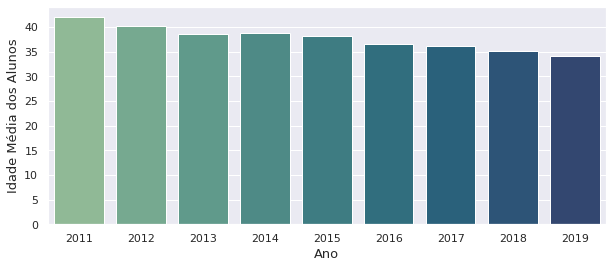

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='MEDIA_IDADE', data=df_concluintes_por_ano, palette='crest')
#pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Idade Média dos Alunos',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

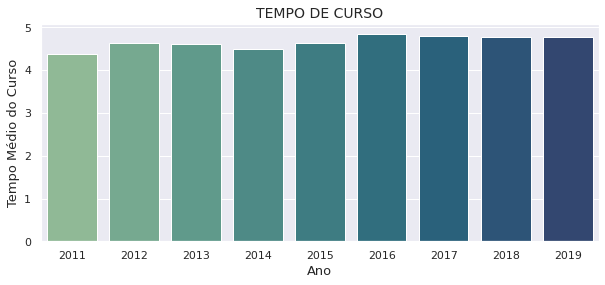

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='TEMPO_MEDIO', data=df_concluintes_por_ano, palette='crest')
pcd_ies_publica_plot.set_title('TEMPO DE CURSO', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Tempo Médio do Curso',fontsize=13)
plt.savefig('tempo_curso.png', transparent = True)

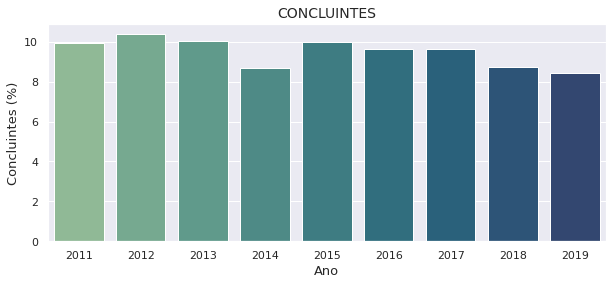

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='PORCENTAGEM_CONCLUINTES', data=df_concluintes_por_ano, palette='crest')
pcd_ies_publica_plot.set_title('CONCLUINTES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Concluintes (%)',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

#3.13 Analisando deficiências e recursos

In [ ]:
df_alunos_deficiencia.head(3)

,ID_ALUNO,CODIGO_IES_x,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE,CODIGO_IES_y,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,32,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,39,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
2,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,43,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75


In [ ]:
#Renomeando colunas
df_alunos_deficiencia = df_alunos_deficiencia.rename(columns={
    'CODIGO_IES_x':'CODIGO_IES',
    'IN_DEFICIENCIA_AUDITIVA':'ALUNOS_COM_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA':'ALUNOS_COM_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL':'ALUNOS_COM_DEFICIENCIA_INTELECTUAL',
    'IN_DEFICIENCIA_MULTIPLA':'ALUNOS_COM_DEFICIENCIA_MULTIPLA',
    'IN_DEFICIENCIA_SURDEZ':'ALUNOS_COM_SURDEZ',
    'IN_DEFICIENCIA_SURDOCEGUEIRA':'ALUNOS_COM_SURDOCEGUEIRA',
    'IN_DEFICIENCIA_BAIXA_VISAO':'ALUNOS_COM_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA':'ALUNOS_COM_CEGUEIRA',
    'IN_DEFICIENCIA_SUPERDOTACAO':'ALUNOS_COM_SUPERDOTACAO',
    'IN_TGD_AUTISMO':'ALUNOS_COM_TGD_AUTISMO',
    'IN_TGD_SINDROME_ASPERGER':'ALUNOS_COM_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT':'ALUNOS_COM_TGD_SINDROME_RETT',
    'IN_TGD_TRANSTOR_DESINTEGRATIVO':'ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO'
    })
df_alunos_deficiencia.head(5)

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE,CODIGO_IES_y,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,32,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,39,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
2,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,43,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
3,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,29,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
4,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,33,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75


#Deficiências

In [ ]:
df_alunos_deficiencia.head(3)

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE,CODIGO_IES_y,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,32,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,39,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
2,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,43,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75


In [ ]:
df_alunos_deficiencia = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF','CODIGO_CURSO','NOME_IES','SIGLA_IES','ALUNOS_COM_DEFICIENCIA_AUDITIVA','ALUNOS_COM_DEFICIENCIA_FISICA','ALUNOS_COM_DEFICIENCIA_INTELECTUAL','ALUNOS_COM_DEFICIENCIA_MULTIPLA','ALUNOS_COM_SURDEZ','ALUNOS_COM_SURDOCEGUEIRA','ALUNOS_COM_BAIXA_VISAO','ALUNOS_COM_CEGUEIRA','ALUNOS_COM_SUPERDOTACAO','ALUNOS_COM_TGD_AUTISMO','ALUNOS_COM_TGD_SINDROME_ASPERGER','ALUNOS_COM_TGD_SINDROME_RETT','ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Alunos com deficiênca física
df_alunos_deficiencia['DEFICIENCIA_FISICA'] = df_alunos_deficiencia['ALUNOS_COM_DEFICIENCIA_FISICA']
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Agrupando as deficiêncas auditivas do aluno
def def_auditiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_AUDITIVA'] + row['ALUNOS_COM_SURDEZ'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_AUDITIVA'] = df_alunos_deficiencia.apply(def_auditiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Agrupando as deficiêncas visuais do aluno
def def_visual(row):
  return row['ALUNOS_COM_BAIXA_VISAO'] + row['ALUNOS_COM_CEGUEIRA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_VISUAL'] = df_alunos_deficiencia.apply(def_visual, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Agrupando as deficiêncas cognitivas do aluno
def def_cognitiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_INTELECTUAL'] + row['ALUNOS_COM_SUPERDOTACAO'] + row['ALUNOS_COM_TGD_AUTISMO'] + row['ALUNOS_COM_TGD_SINDROME_ASPERGER'] + row['ALUNOS_COM_TGD_SINDROME_RETT'] + row['ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO']

df_alunos_deficiencia['DEFICIENCIA_COGNITIVA'] = df_alunos_deficiencia.apply(def_cognitiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Agrupando as deficiêncas múltiplas do aluno
def def_mutipla(row):
  return row['ALUNOS_COM_DEFICIENCIA_MULTIPLA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_MULTIPLA'] = df_alunos_deficiencia.apply(def_mutipla, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_classes = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF']].drop_duplicates()
df_classes.head()

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF
0,1,Pública Federal,Centro-Oeste,Mato Grosso
210,2,Pública Federal,Centro-Oeste,Distrito Federal
340,3,Pública Federal,Nordeste,Sergipe
698,4,Pública Federal,Norte,Amazonas
911,5,Pública Federal,Nordeste,Piauí


In [ ]:
df_classes = df_classes.set_index('CODIGO_IES')
df_classes.head()

,TIPO_CATEGORIA_ADM,REGIAO,UF
CODIGO_IES,,,
1,Pública Federal,Centro-Oeste,Mato Grosso
2,Pública Federal,Centro-Oeste,Distrito Federal
3,Pública Federal,Nordeste,Sergipe
4,Pública Federal,Norte,Amazonas
5,Pública Federal,Nordeste,Piauí


In [ ]:
df_alunos_deficiencia.head()

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,CODIGO_CURSO,NOME_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,Pública Federal,Centro-Oeste,Mato Grosso,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#df_ies_deficiencia = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
#df_ies_deficiencia.head(3)

#Recursos

In [ ]:
df_deficiencias_e_recursos = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_deficiencias_e_recursos.head(3)

,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência física
def recurso_def_fisica(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_FISICA'] = df_deficiencias_e_recursos.apply(recurso_def_fisica, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiências visuais
def recurso_def_visual(row):
  return row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_VISUAL'] = df_deficiencias_e_recursos.apply(recurso_def_visual, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência auditiva
def recurso_def_auditiva(row):
  return row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_AUDITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_auditiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência cognitiva
def recurso_def_cognitiva(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_COGNITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_cognitiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência múltipla
def recurso_def_multipla(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_MULTIPLA'] = df_deficiencias_e_recursos.apply(recurso_def_multipla, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_recursos = df_deficiencias_e_recursos
df_recursos.head(3)

,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Juntando todas as informações por curso

In [ ]:
df_deficiencias = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
df_deficiencias.head(3)

,CODIGO_IES,CODIGO_CURSO,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA
0,1,1,1.0,0.0,0.0,0.0,0.0
1,1,1,1.0,0.0,0.0,0.0,0.0
2,1,1,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Agrupando alunos com deficiência por curso e ies
df_deficiencias_agrupado = df_deficiencias.groupby(['CODIGO_CURSO','CODIGO_IES']).sum()
df_deficiencias_agrupado.reset_index(inplace=True)
df_deficiencias_agrupado.head(5)

,CODIGO_CURSO,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA
0,1,1,8.0,0.0,0.0,0.0,0.0
1,2,1,1.0,0.0,1.0,0.0,0.0
2,3,1,2.0,0.0,0.0,0.0,0.0
3,6,1,4.0,1.0,3.0,0.0,0.0
4,7,1,1.0,2.0,0.0,0.0,1.0


In [ ]:
df_recursos.drop_duplicates('CODIGO_CURSO')

,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,7.0,6.0,3.0,3.0
20,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42904,23700,1458087,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42905,23705,5001434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42906,23713,1503889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42908,23867,1525967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0


In [ ]:
#Agrupando alunos com deficiência por curso
df_recursos_agrupado = df_recursos.drop_duplicates('CODIGO_CURSO')
df_recursos_agrupado.head(5)

,CODIGO_IES,CODIGO_CURSO,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,7.0,6.0,3.0,3.0
20,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_recursos_agrupado = df_recursos_agrupado[['CODIGO_IES','CODIGO_CURSO','RECURSOS_DEF_FISICA','RECURSOS_DEF_VISUAL','RECURSOS_DEF_AUDITIVA','RECURSOS_DEF_COGNITIVA','RECURSOS_DEF_MULTIPLA']]
df_recursos_agrupado.head(3)

,CODIGO_IES,CODIGO_CURSO,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,0.0,0.0,1.0,0.0,0.0
8,1,2,0.0,0.0,0.0,0.0,0.0
10,1,3,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Join aluno e recurso
df_deficiencias_e_recursos = df_deficiencias_agrupado.join(df_recursos_agrupado.set_index(['CODIGO_IES','CODIGO_CURSO']), on=['CODIGO_IES','CODIGO_CURSO'])
df_deficiencias_e_recursos.head(3)

,CODIGO_CURSO,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Agrupando por IES
df_ies_agrupado = df_deficiencias_e_recursos.drop(columns='CODIGO_CURSO').groupby('CODIGO_IES').sum().reset_index()
df_ies_agrupado

,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,92.0,58.0,44.0,17.0,2.0,23.0,49.0,107.0,23.0,23.0
1,2,39.0,32.0,27.0,32.0,8.0,276.0,621.0,552.0,276.0,276.0
2,3,190.0,56.0,94.0,16.0,2.0,62.0,141.0,208.0,62.0,62.0
3,4,64.0,33.0,54.0,60.0,2.0,0.0,0.0,77.0,0.0,0.0
4,5,137.0,50.0,73.0,36.0,3.0,252.0,588.0,588.0,252.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...
1373,23700,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1374,23705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375,23713,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1376,23867,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0


In [ ]:
#Unindo com as informações sobre IES
df_dados_ies = df_classes.reset_index().join(df_ies_agrupado.set_index('CODIGO_IES'), on='CODIGO_IES')
df_dados_ies.head()

,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,23.0,49.0,107.0,23.0,23.0
1,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,276.0,621.0,552.0,276.0,276.0
2,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,62.0,141.0,208.0,62.0,62.0
3,4,Pública Federal,Norte,Amazonas,64.0,33.0,54.0,60.0,2.0,0.0,0.0,77.0,0.0,0.0
4,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,252.0,588.0,588.0,252.0,252.0


In [ ]:
df_dados_ies = df_cursos_por_ies.join(df_dados_ies.set_index('CODIGO_IES'), on='CODIGO_IES')
df_dados_ies.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,23.0,49.0,107.0,23.0,23.0
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,276.0,621.0,552.0,276.0,276.0
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,62.0,141.0,208.0,62.0,62.0
3,107,4,Pública Federal,Norte,Amazonas,64.0,33.0,54.0,60.0,2.0,0.0,0.0,77.0,0.0,0.0
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,252.0,588.0,588.0,252.0,252.0


In [ ]:
df_dados_ies.loc[df_dados_ies['NUM_CURSOS'] > 200]

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
38,296,55,Pública Estadual,Sudeste,São Paulo,12.0,8.0,10.0,23.0,0.0,87.0,145.0,116.0,87.0,87.0
39,215,56,Pública Estadual,Sudeste,São Paulo,29.0,17.0,24.0,36.0,7.0,54.0,85.0,83.0,54.0,54.0
88,563,163,Privada com fins lucrativos,Sudeste,Rio de Janeiro,246.0,88.0,135.0,36.0,13.0,558.0,847.0,951.0,558.0,558.0
150,284,316,Privada sem fins lucrativos,Sudeste,São Paulo,505.0,234.0,388.0,99.0,17.0,756.0,1396.0,1443.0,756.0,756.0
153,928,322,Privada com fins lucrativos,Sudeste,São Paulo,470.0,364.0,127.0,23.0,5.0,1459.0,2919.0,2554.0,1459.0,1459.0
1357,247,3172,Pública Estadual,Norte,Amazonas,3.0,2.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculando a média dos recursos
df_dados_ies['RECURSOS_DEF_FISICA'] = df_dados_ies['RECURSOS_DEF_FISICA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_VISUAL'] = df_dados_ies['RECURSOS_DEF_VISUAL']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_AUDITIVA'] = df_dados_ies['RECURSOS_DEF_AUDITIVA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_COGNITIVA'] = df_dados_ies['RECURSOS_DEF_COGNITIVA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_MULTIPLA'] = df_dados_ies['RECURSOS_DEF_MULTIPLA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.201754,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,1.852349,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.534483,1.215517,1.793103,0.534483,0.534483
3,107,4,Pública Federal,Norte,Amazonas,64.0,33.0,54.0,60.0,2.0,0.000000,0.000000,0.719626,0.000000,0.000000
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,2.520000,5.880000,5.880000,2.520000,2.520000


In [ ]:
df_dados_ies.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,2608.000000,2608.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,15.609279,6872.965874,10.470972,5.923077,10.690131,5.108853,0.594340,1.048136,1.831375,2.025107,1.048136,1.048136
std,33.813705,7545.457622,37.475156,31.165147,39.208349,24.047455,2.440019,1.071272,1.865245,2.014137,1.071272,1.071272
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1373.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.336957,0.500000,0.200000,0.200000
50%,6.000000,2857.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.666667,1.211694,1.298148,0.666667,0.666667
75%,15.000000,14161.250000,5.000000,3.000000,5.000000,2.000000,0.000000,1.600000,2.933514,3.000000,1.600000,1.600000
max,928.000000,24672.000000,505.000000,883.000000,616.000000,634.000000,42.000000,4.000000,9.000000,8.000000,4.000000,4.000000


In [ ]:
df_dados_ies.loc[df_dados_ies['RECURSOS_DEF_FISICA'] > 200]

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA


Analisando a correlação entre os dados

In [ ]:
df_dados_ies.corr()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
NUM_CURSOS,1.000000,-0.252775,0.619667,0.435116,0.435401,0.266265,0.442854,-0.006293,0.030850,0.000680,-0.006293,-0.006293
CODIGO_IES,-0.252775,1.000000,-0.145038,-0.096852,-0.138757,-0.102329,-0.131606,0.121593,0.087951,0.125948,0.121593,0.121593
DEFICIENCIA_FISICA,0.619667,-0.145038,1.000000,0.748141,0.779292,0.475872,0.602815,0.192012,0.219918,0.205120,0.192012,0.192012
DEFICIENCIA_AUDITIVA,0.435116,-0.096852,0.748141,1.000000,0.690710,0.466556,0.521373,0.166664,0.194157,0.179401,0.166664,0.166664
DEFICIENCIA_VISUAL,0.435401,-0.138757,0.779292,0.690710,1.000000,0.497631,0.660917,0.224684,0.257929,0.242357,0.224684,0.224684
DEFICIENCIA_COGNITIVA,0.266265,-0.102329,0.475872,0.466556,0.497631,1.000000,0.400433,0.130119,0.179599,0.165648,0.130119,0.130119
DEFICIENCIA_MULTIPLA,0.442854,-0.131606,0.602815,0.521373,0.660917,0.400433,1.000000,0.117332,0.154340,0.130873,0.117332,0.117332
RECURSOS_DEF_FISICA,-0.006293,0.121593,0.192012,0.166664,0.224684,0.130119,0.117332,1.000000,0.949576,0.963009,1.000000,1.000000
RECURSOS_DEF_VISUAL,0.030850,0.087951,0.219918,0.194157,0.257929,0.179599,0.154340,0.949576,1.000000,0.943755,0.949576,0.949576
RECURSOS_DEF_AUDITIVA,0.000680,0.125948,0.205120,0.179401,0.242357,0.165648,0.130873,0.963009,0.943755,1.000000,0.963009,0.963009


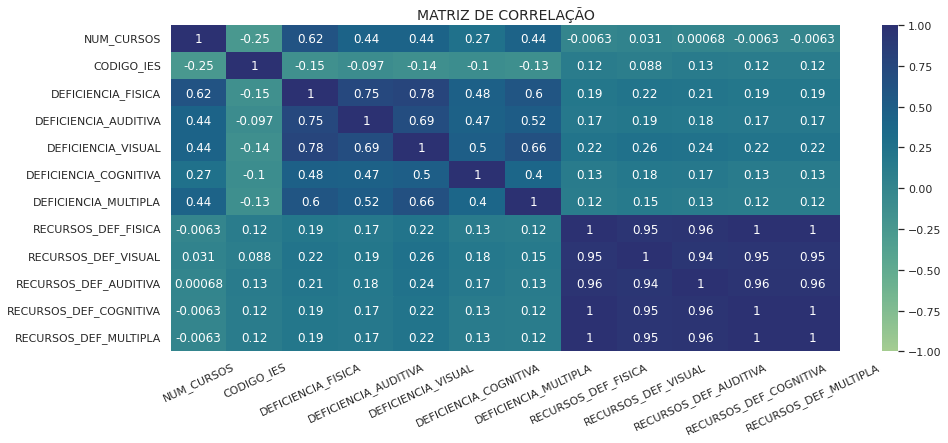

In [ ]:
plt.figure(figsize =(15, 6))
sns.heatmap(df_dados_ies.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'crest', linecolor='white', xticklabels='auto', yticklabels='auto')
plt.tick_params(axis='x', rotation=25)
plt.title("MATRIZ DE CORRELAÇÃO", fontsize=14)
plt.savefig('matriz_correlacao_def_recursos.png', transparent = True)

In [ ]:
#Exportando o dataframe para um arquivo csv
df_dados_ies.to_csv('dados_ies.csv',sep=',', encoding='latin1')

#3.14 Analisando a quantidade de alunos matriculas por IES

In [ ]:
alunos_ies = df_curso_e_ies_publico[['CODIGO_IES','ALUNOS_COM_DEFICIENCIA','NUM_ALUNOS_MATRICULADOS']]
alunos_ies.head()

,CODIGO_IES,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS
0,1,8,447
1,1,2,323
2,1,2,248
3,1,8,331
4,1,4,274


In [ ]:
#Calculando a quantidade de alunos por IES
alunos = alunos_ies.groupby(['CODIGO_IES']).sum()
alunos.head()

,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS
CODIGO_IES,,
1,210,20633
2,130,36292
3,358,24937
4,213,28424
5,299,28716


In [ ]:
alunos['PORCENTAGEM'] = alunos['ALUNOS_COM_DEFICIENCIA']/alunos['NUM_ALUNOS_MATRICULADOS'] * 100
alunos.head()

,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS,PORCENTAGEM
CODIGO_IES,,,
1,210,20633,1.017787
2,130,36292,0.358206
3,358,24937,1.435618
4,213,28424,0.749367
5,299,28716,1.041231


In [ ]:
siglas_ies = df_curso_e_ies_publico[['CODIGO_IES','SIGLA_IES']].drop_duplicates()
siglas_ies.head()

,CODIGO_IES,SIGLA_IES
0,1,UFMT
114,2,UNB
263,3,UFS
379,4,UFAM
486,6,UFOP


In [ ]:
#Agrupando os dados
alunos_ies = pd.merge(siglas_ies, alunos, how='inner', on='CODIGO_IES')
alunos_ies.head()

,CODIGO_IES,SIGLA_IES,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS,PORCENTAGEM
0,1,UFMT,210,20633,1.017787
1,2,UNB,130,36292,0.358206
2,3,UFS,358,24937,1.435618
3,4,UFAM,213,28424,0.749367
4,6,UFOP,99,12185,0.812474


In [ ]:
df_ies_publica = df_curso[['CODIGO_IES','TIPO_CATEGORIA_ADM']].drop_duplicates()
df_ies_publica.loc[(df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_ies_publica.head()

,CODIGO_IES,TIPO_CATEGORIA_ADM
0,1,Pública Federal
1,2,Pública Federal
2,3,Pública Federal
3,4,Pública Federal
4,6,Pública Federal


In [ ]:
#Agrupando os dados
alunos_ies = pd.merge(df_ies_publica, alunos_ies, how='inner', on='CODIGO_IES')
alunos_ies.head()

,CODIGO_IES,TIPO_CATEGORIA_ADM,SIGLA_IES,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS,PORCENTAGEM
0,1,Pública Federal,UFMT,210,20633,1.017787
1,2,Pública Federal,UNB,130,36292,0.358206
2,3,Pública Federal,UFS,358,24937,1.435618
3,4,Pública Federal,UFAM,213,28424,0.749367
4,6,Pública Federal,UFOP,99,12185,0.812474


In [ ]:
alunos_ies_ord = alunos_ies.sort_values(['PORCENTAGEM'], ascending=False).reset_index()
alunos_ies_ord.head(10)

,index,CODIGO_IES,TIPO_CATEGORIA_ADM,SIGLA_IES,ALUNOS_COM_DEFICIENCIA,NUM_ALUNOS_MATRICULADOS,PORCENTAGEM
0,119,4016,Pública Federal,INES,359,976,36.782787
1,116,549,Pública Federal,UFAC,412,8892,4.633378
2,186,1166,Pública Federal,IFPB,405,8929,4.535782
3,204,14408,Pública Federal,IFB,149,3823,3.897463
4,146,890,Pública Estadual,EG,8,220,3.636364
5,174,3188,Pública Federal,IFNMG,177,5821,3.040715
6,180,1082,Pública Federal,IFRN,133,5190,2.562620
7,191,4786,Pública Federal,IFTO,107,4255,2.514689
8,213,2564,Pública Federal,UFCG,405,16132,2.510538
9,90,43,Pública Estadual,UDESC,305,12418,2.456112


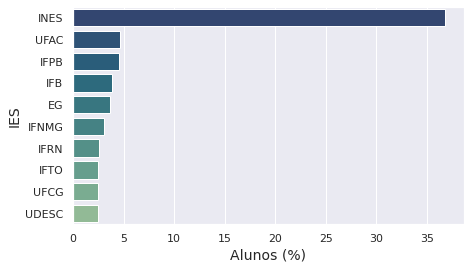

In [ ]:
#Visualizando
plt.figure(figsize=(7,4))
alunos_plot = sns.barplot(x='PORCENTAGEM', y='SIGLA_IES', data=alunos_ies_ord.head(10), palette='crest_r',)
#alunos_plot.set_title('ALUNOS POR IES', fontsize = 15)
alunos_plot.set_xlabel('Alunos (%)',fontsize = 14), alunos_plot.set_ylabel('IES',fontsize=14)
plt.savefig('alunos_por_ies.png', transparent = True)